# Bitcoin Stock Price Prediction

In recent years, Bitcoin has emerged as a significant financial asset, attracting attention from investors, traders, and analysts alike. The volatile nature of its price presents both opportunities and challenges for individuals and institutions seeking to profit from or manage risk in the cryptocurrency market. Predicting the trend of Bitcoin prices accurately can greatly benefit traders and investors in making informed decisions.

To address this need, this project aims to develop a machine learning model capable of predicting the trend (whether the price will increase, decrease, or remain stable) of Bitcoin over the next time period based on 8 years (2015-2024) historical price data and relevant indicators.

This dataset offers a comprehensive analysis of Bitcoin's price dynamics spanning the last eight years. It encompasses key metrics such as daily opening, highest, lowest, and closing prices, along with trading volume. Momentum indicators like the 7-day and 14-day Relative Strength Index (RSI) are included to gauge the asset's buying and selling pressure. Additionally, the dataset features the 7-day and 14-day Commodity Channel Index (CCI) to identify short- and medium-term trends by comparing current prices with historical averages. Moving averages such as the 50-day and 100-day Simple Moving Average (SMA) and Exponential Moving Average (EMA) offer insights into trend directions. Furthermore, indicators like Moving Average Convergence Divergence (MACD), Bollinger Bands, True Range, and the 7-day and 14-day Average True Range (ATR) provide valuable information on price volatility. The primary aim of this dataset is to forecast the closing price for the following day, making it an indispensable resource for predicting future market movements.

Kaggle Dataset:https://www.kaggle.com/datasets/aspillai/bitcoin-price-trends-with-indicators-8-years?resource=download

## Import Libraries

In [ ]:
# First we will import the necessary Library

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots




## Import Dataset

In [ ]:
DF = pd.read_csv('btc_2015_2024.csv')

In [ ]:
print('Total number of days present in the dataset: ',DF.shape[0])
print('Total number of fields present in the dataset: ',DF.shape[1])

Total number of days present in the dataset:  3355
Total number of fields present in the dataset:  20


In [ ]:
DF.shape

(3355, 20)

In [ ]:
DF.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
0,2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650.0,100.000000,100.000000,-66.666667,-66.666667,314.640503,314.648333,314.640503,314.644418,0.017568,314.640503,2.273987,4.193073,4.275997,281.082001
1,2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400.0,1.938583,2.096744,-100.000000,-100.000000,303.454336,303.009081,303.454336,303.232458,-1.030403,303.454336,34.067993,15.719617,14.951008,264.195007
2,2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100.0,1.235506,1.375421,-110.693896,-110.693896,293.639503,292.715747,293.639503,293.178382,-2.091487,293.639503,29.618011,20.033779,19.034849,274.473999
3,2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800.0,21.462825,19.523695,-76.487357,-76.487357,289.806403,288.769813,289.806403,289.286389,-2.215008,289.806403,14.145996,18.468441,17.907070,286.188995
4,2015-01-06,274.610992,287.553009,272.696014,286.188995,23245700.0,38.272356,34.350787,-37.070244,-37.070244,289.203501,288.295540,289.203501,288.744005,-1.746686,289.203501,14.856995,17.613461,17.300126,294.337006


In [ ]:
DF.tail()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
3350,2024-03-05,68341.054688,69170.625000,59323.910156,63801.199219,1.028029e+11,64.416956,69.448775,59.907457,82.236455,48645.974688,51266.109482,45662.676953,46364.610363,4648.695293,56210.458594,9846.714844,3839.484498,2859.387618,66106.804688
3351,2024-03-06,63776.050781,67637.929688,62848.671875,66106.804688,6.875023e+10,69.505477,72.378996,85.488532,87.939982,49105.011875,51848.097530,45951.203320,46755.544904,4772.051246,56918.871094,4789.257813,3975.166400,2997.235489,66925.484375
3352,2024-03-07,66099.742188,68029.921875,65655.531250,66925.484375,4.698954e+10,71.210976,73.356192,100.671004,95.339598,49588.668516,52439.367602,46242.147305,47154.949646,4879.623079,57657.135156,2374.390625,3746.484147,2952.746570,68300.093750
3353,2024-03-08,66938.093750,70083.054688,66230.453125,68300.093750,5.920288e+10,74.053595,74.958176,109.722723,108.701098,50129.429219,53061.356863,46546.563320,47573.665371,5017.950214,58488.990039,3852.601563,3761.643778,3017.021926,68498.882813
3354,2024-03-09,68299.257813,68673.054688,68053.125000,68498.882813,2.160965e+10,74.478756,75.190491,95.739979,108.210821,50667.038750,53666.750037,46854.424688,47988.026112,5084.999374,59307.806836,619.929688,3312.827479,2845.801052,69019.789063


In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3355 entries, 0 to 3354
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            3355 non-null   object 
 1   open            3355 non-null   float64
 2   high            3355 non-null   float64
 3   low             3355 non-null   float64
 4   close           3355 non-null   float64
 5   volume          3355 non-null   float64
 6   rsi_7           3355 non-null   float64
 7   rsi_14          3355 non-null   float64
 8   cci_7           3355 non-null   float64
 9   cci_14          3355 non-null   float64
 10  sma_50          3355 non-null   float64
 11  ema_50          3355 non-null   float64
 12  sma_100         3355 non-null   float64
 13  ema_100         3355 non-null   float64
 14  macd            3355 non-null   float64
 15  bollinger       3355 non-null   float64
 16  TrueRange       3355 non-null   float64
 17  atr_7           3355 non-null   f

In [ ]:
print('Null Values:',DF.isnull().values.sum())

Null Values: 0


In [ ]:
print('NA values:',DF.isnull().values.any())

NA values: False


From the above, it is clear that there are 3355 dataset with 20 variables. There are also no Null value which indicates that there is no need to remove null values from the datasets. However, we need to get a clearer understanding of the dataset so we will be performing EDA

## EDA

In this exploratory data analysis (EDA) phase, our goal is to gain a deeper understanding of the Bitcoin price trends from 2015 to 2024 through visual exploration of the dataset

In [ ]:
# Printing the start date and End date of the dataset

sd=DF.iloc[0][0]
ed=DF.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)


Starting Date 2015-01-02
Ending Date 2024-03-09


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from itertools import cycle

def analyze_stock_yearly(DF, start_date='2015-01-02', end_date='2024-03-09'):
    # Convert 'date' column to datetime
    DF['date'] = pd.to_datetime(DF['date'], format='%Y-%m-%d')

    # Filter data for the specified date range
    y_range = DF.loc[(DF['date'] >= start_date) & (DF['date'] <= end_date)].copy()

    # Calculate month-wise statistics
    monthvise = y_range.groupby(y_range['date'].dt.strftime('%B'))[['open','close']].mean()
    new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                 'September', 'October', 'November', 'December']
    monthvise = monthvise.reindex(new_order, axis=0)
    display(monthvise)
    # Plotting Monthwise comparison between Stock open and close price
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=monthvise.index,
        y=monthvise['open'],
        name='Stock Open Price',
        marker_color='crimson'
    ))
    fig.add_trace(go.Bar(
        x=monthvise.index,
        y=monthvise['close'],
        name='Stock Close Price',
        marker_color='lightsalmon'
    ))
    fig.update_layout(barmode='group', xaxis_tickangle=-45,
                      title='Monthwise comparison between Stock open and close price')
    fig.show()

    # Plotting Monthwise High and Low stock price
    monthvise_high = y_range.groupby(y_range['date'].dt.strftime('%B'))['high'].max()
    monthvise_high = monthvise_high.reindex(new_order, axis=0)

    monthvise_low = y_range.groupby(y_range['date'].dt.strftime('%B'))['low'].min()
    monthvise_low = monthvise_low.reindex(new_order, axis=0)

    print("Monthwise High Stock Price:")
    display(monthvise_high)
    print("Monthwise Low Stock Price:")
    display(monthvise_low)

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=monthvise_high.index,
        y=monthvise_high,
        name='Stock High Price',
        marker_color='rgb(0, 153, 204)'
    ))
    fig.add_trace(go.Bar(
        x=monthvise_low.index,
        y=monthvise_low,
        name='Stock Low Price',
        marker_color='rgb(255, 128, 0)'
    ))
    fig.update_layout(barmode='group',
                      title=' Monthwise High and Low stock price')
    fig.show()

    # Plotting Stock analysis chart
    names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])
    fig = px.line(y_range, x=y_range.date, y=[y_range['open'], y_range['close'],
                                              y_range['high'], y_range['low']],
                  labels={'Date': 'Date','value':'Stock value'})
    fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black', legend_title_text='Stock Parameters')
    fig.for_each_trace(lambda t:  t.update(name = next(names)))
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.show()

### 2015 Analysis

In [ ]:
analyze_stock_yearly(DF, start_date='2015-01-02', end_date='2015-12-31')
#analyze_stock_yearly(DF, start_date='2015-01-02', end_date='2024-03-09')

,open,close
date,,
January,249.512069,246.600333
February,232.821856,234.153645
March,269.278419,269.042259
April,235.708667,235.491534
May,237.161806,236.997001
June,236.941433,238.081766
July,278.857679,279.563740
August,252.986774,250.733805
September,233.486733,233.595533


Monthwise High Stock Price:


date
January      315.838989
February     265.610992
March        300.044006
April        261.798004
May          247.804001
June         267.867004
July         314.394012
August       285.714996
September    259.182007
October      334.169006
November     495.562012
December     469.102997
Name: high, dtype: float64

Monthwise Low Stock Price:


date
January      171.509995
February     212.014999
March        236.514999
April        214.873993
May          228.572998
June         221.296005
July         253.505005
August       199.567001
September    225.117004
October      235.615997
November     300.997009
December     349.464996
Name: low, dtype: float64

**Monthwise Open and Close Price:**

- January: The year 2015 began with an open price of approximately 249.51
 and closed at around 246.60. This slight decrease in the closing price compared to the opening price may suggest a cautious start to the year, with potential market correction or uncertainty.

- February: Prices saw a decrease in the opening price to about 232.82 but slightly increased at the close to around 234.15. Despite the lower open price, the uptick in the closing price indicates a positive sentiment or market growth compared to January.

- March: Both the open and close prices remained relatively stable, hovering around 269.28 and 269.04, respectively, suggesting a period of market equilibrium with minor fluctuations.

- April: Although the open and close prices were similar to March, around 235.71 and 235.49 respectively, notable market activity was observed, potentially signaling strong performance or investor interest.

- May: Prices experienced a marginal drop compared to April, with the open and close prices around 237.16 and 237.00 respectively, but remained relatively high, indicating sustained market activity.

- June: The market witnessed a slight increase in both open and close prices, with values around 236.94 and 238.08 respectively, suggesting potential market recovery or positive news/events.

- July: High prices were maintained during July, with the open and close prices at approximately 278.86 and 279.56 respectively, indicating continued market growth or positive sentiment.

- August: Prices experienced a slight decline compared to July, with open and close prices around 252.99 and 250.73 respectively, but remained relatively stable.

- September: Both open and close prices showed a slight increase, hovering around 233.49 and 233.60 respectively, potentially signaling market recovery or positive developments.

- October: Prices remained relatively stable with minor fluctuations, indicating a period of market equilibrium, with open and close prices at approximately 262.31 and 264.86 respectively.

- November: The market saw a significant increase in both open and close prices, with values around 346.87 and 348.88 respectively, surpassing the previous months, potentially signaling strong market performance.

- December: The year closed with relatively high prices, reflecting overall market stability and positive sentiment, with open and close prices around 422.62 and 424.46 respectively.

**Monthwise High and Low Stock Price:**

- The highest stock prices were observed in the months of April, November, and December, indicating periods of strong market performance and positive sentiment.

- The lowest stock prices were observed in January, potentially reflecting market correction or uncertainty. However, throughout the year, the low prices gradually increased, suggesting market recovery and stability.

**Stock Analysis Chart:**

- The stock analysis chart visually depicts the trends in open, close, high, and low prices throughout the year.

- The chart reveals periods of market growth, stability, and correction.

- The overall trend suggests a positive market performance in 2015, with high prices and gradual recovery during periods of decline.

### 2016 Analysis

In [ ]:
analyze_stock_yearly(DF, start_date='2016-01-01', end_date='2016-12-31')
#analyze_stock_yearly(DF, start_date='2015-01-02', end_date='2024-03-09')

,open,close
date,,
January,412.805902,410.844485
February,402.304692,404.408274
March,417.262033,416.525774
April,433.487433,434.339398
May,459.237547,461.954415
June,638.544834,642.869061
July,662.977779,661.356103
August,581.238966,579.585197
September,604.614034,605.848633


Monthwise High Stock Price:


date
January      462.933990
February     448.045990
March        439.653015
April        467.964996
May          553.960022
June         777.989990
July         704.968018
August       626.119019
September    628.817993
October      720.401978
November     756.237000
December     979.396973
Name: high, dtype: float64

Monthwise Low Stock Price:


date
January      354.914001
February     367.957001
March        394.035004
April        415.830994
May          437.389008
June         525.635986
July         611.833984
August       531.333984
September    570.810974
October      609.479004
November     678.156006
December     746.046021
Name: low, dtype: float64

**Monthwise Open and Close Price:**

- January: The year 2016 began with an open price of approximately 412.81 and closed slightly lower at around 410.84.

- February: Prices experienced a minor decrease from January's close but remained relatively stable, with an average open price of 402.30 and close price of 404.41.

- March: Both open and close prices saw a slight increase, with average values of 417.26 and 416.53, respectively.

- April: A notable increase in prices occurred, with the open and close prices reaching approximately 433.49 and 434.34, respectively.

- May: Prices continued to rise steadily, with an average open price of 459.24 and close price of 461.95.

- June: The market experienced a significant surge in prices, with the average open and close prices soaring to 638.54 and 642.87, respectively.

- July: High prices were maintained, with an average open price of 662.98 and close price of 661.36.

- August: Prices experienced a slight decline compared to July, with average open and close prices of 581.24 and 579.59, respectively.

- September: Prices saw a slight increase, with average open and close prices of 604.61 and 605.85, respectively.

- October: Both open and close prices experienced a rise, with average values of 640.70 and 643.55, respectively.

- November: The market saw a significant increase in prices, with the average open and close prices reaching 725.07 and 726.35, respectively.

- December: The year closed with relatively high prices, with average open and close prices of 821.11 and 828.06, respectively.

**Monthwise High and Low Stock Price:**

- The highest stock prices were observed in the months of June, July, November, and December, indicating periods of strong market performance and positive sentiment. June recorded the highest average high price of approximately 778.00, while December had the highest average low price of around 746.05.

- The lowest stock prices were observed in the month of January, with an average low price of approximately 354.91, potentially reflecting market correction or uncertainty. However, throughout the year, the low prices gradually increased, suggesting market recovery and stability.

**Stock Analysis Chart:**

- The stock analysis chart visually depicts the trends in open, close, high, and low prices throughout the year. The chart reveals periods of market growth, stability, and correction. Overall, the trend suggests a positive market performance in 2016, with high prices and gradual recovery during periods of decline.

### 2017 Analysis

In [ ]:
analyze_stock_yearly(DF, start_date='2017-01-01', end_date='2017-12-31')
#analyze_stock_yearly(DF, start_date='2015-01-02', end_date='2024-03-09')

,open,close
date,,
January,914.680971,914.916159
February,1055.620071,1062.533672
March,1133.212576,1129.365228
April,1197.646997,1206.641007
May,1865.748712,1895.383529
June,2630.573332,2636.204346
July,2509.213233,2519.418386
August,3819.812579,3880.989998
September,4077.400993,4064.836312


Monthwise High Stock Price:


date
January       1191.099976
February      1200.390015
March         1280.310059
April         1347.910034
May           2763.709961
June          2999.909912
July          2916.139893
August        4736.049805
September     4975.040039
October       6470.430176
November     11517.400391
December     20089.000000
Name: high, dtype: float64

Monthwise Low Stock Price:


date
January       755.755981
February      946.690979
March         903.713013
April        1061.089966
May          1348.300049
June         2212.959961
July         1843.030029
August       2668.590088
September    2946.620117
October      4164.049805
November     5519.009766
December     9694.650391
Name: low, dtype: float64

**Monthwise Open and Close Price:**

- January: The year 2017 started with the stock opening at 914.68 and closing at 914.92, maintaining stability in the market sentiment.

- February: Both the open and close prices experienced a rise, indicating growing positivity with the open price at 1055.62 and the close price at 1062.53.

- March: Although the open and close prices remained relatively stable, there was a slight decrease compared to February, with the open at 1133.21 and the close at 1129.37.

- April: A significant increase was observed in both the open and close prices, reaching 1197.65 and 1206.64 respectively, signaling robust market performance.

- May: Prices surged notably, with the open and close prices at 1865.75 and 1895.38, reflecting strong market growth.

- June: The upward trend continued with prices rising steadily, indicating sustained positive sentiment, with open and close prices at 2630.57 and 2636.20.

- July: Despite minor fluctuations, prices remained high, with the open at 2509.21 and the close at 2519.42.

- August: Prices experienced a slight decline compared to July but remained relatively stable, with the open at 3819.81 and the close at 3880.99.

- September: Although there was a slight decrease compared to August, prices remained robust, with the open at 4077.40 and the close at 4064.84.

- October: The market saw stability with minor fluctuations, with the open at 5291.37 and the close at 5360.07.

- November: Prices surged significantly, surpassing the previous months, with the open at 7685.75 and the close at 7813.13, indicating strong market performance.

- December: The year concluded on a high note with prices reaching their peak, reflecting overall market stability and positive sentiment, with the open at 15175.22 and the close at 15294.27.

**Monthwise High and Low Stock Price:**

- The highest stock prices were observed in April, November, and December, indicating periods of strong market performance and positive sentiment, with peaks at 1347.91, 11517.40, and 20089.00 respectively.

- The lowest stock prices were recorded in January, with a low of 755.76, potentially reflecting initial market corrections or uncertainties. However, throughout the year, the low prices gradually increased, suggesting market recovery and stability, with December recording a low of 9694.65.

**Stock Analysis Chart:**

- The stock analysis chart visually depicts the trends in open, close, high, and low prices throughout the year. It reveals periods of market growth, stability, and correction, with an overall positive trend indicating a successful year with significant growth and stability in the market.

### 2018 Analysis

In [ ]:
analyze_stock_yearly(DF, start_date='2018-01-01', end_date='2018-12-31')
#analyze_stock_yearly(DF, start_date='2015-01-02', end_date='2024-03-09')

,open,close
date,,
January,13212.074219,13085.558090
February,9462.242920,9472.001151
March,9156.591718,9040.557097
April,7963.618311,8033.596631
May,8505.240675,8450.997732
June,6829.257975,6793.507666
July,7101.466450,7146.349987
August,6723.800955,6700.129946
September,6622.821338,6610.675033


Monthwise High Stock Price:


date
January      17712.400391
February     11958.500000
March        11704.099609
April         9745.320313
May           9964.500000
June          7754.890137
July          8424.269531
August        7769.040039
September     7388.430176
October       6965.060059
November      6552.160156
December      4309.377441
Name: high, dtype: float64

Monthwise Low Stock Price:


date
January      9402.290039
February     6048.259766
March        6683.930176
April        6526.870117
May          7090.680176
June         5826.410156
July         6136.419922
August       5971.049805
September    6197.520020
October      6236.470215
November     3585.060059
December     3191.303467
Name: low, dtype: float64

**Monthwise Open and Close Price:**

- January: The year 2018 began with an open price of approximately 13,212.07, and closed slightly lower at around 13,085.56, indicating a positive market sentiment at the start of the year.

- February: Prices experienced a slight increase compared to January, with an open price of about 9,462.24 and a close price of approximately 9,472.00, suggesting a continuation of positive market sentiment or growth.

- March: Both the open and close prices decreased compared to February, with open and close prices around 9,156.59 and 9,040.56 respectively, indicating a potential correction or uncertainty in the market.

- April: Prices experienced a further decline in April, with an open price of approximately 7,963.62 and a close price of around 8,033.60, potentially indicating continued market correction or instability.

- May: Prices remained relatively stable compared to April, with a slight decrease in both open and close prices, hovering around 8,505.24 and 8,450.99 respectively.

- June: The market saw a slight decrease in prices compared to May, with open and close prices around 6,829.26 and 6,793.51 respectively, potentially reflecting continued market correction or uncertainty.

- July: Prices remained relatively stable in July, with minor fluctuations compared to June, indicating a period of market equilibrium, with open and close prices approximately 7,101.47 and 7,146.35 respectively.

- August: Prices experienced a slight decrease compared to July, with open and close prices around 6,723.80 and 6,700.13 respectively, maintaining overall stability in the market.

- September: Prices remained relatively stable in September, with minor fluctuations compared to August, suggesting continued market equilibrium, with open and close prices approximately 6,622.82 and 6,610.68 respectively.

- October: Prices remained relatively stable in October, with open and close prices around 6,494.02 and 6,485.12 respectively, indicating a continuation of market equilibrium.

- November: The market saw a significant decrease in prices in November, with open and close prices approximately 5,481.62 and 5,404.25 respectively, potentially indicating a period of market correction or uncertainty.

- December: The year closed with relatively low prices in December, with open and close prices around 3,726.48 and 3,717.49 respectively, reflecting overall market correction or uncertainty towards the end of the year.

**Monthwise High and Low Stock Price:**

- The highest stock prices were observed in the months of January, February, and March, with highs ranging from approximately 11,704.10 to 17,712.40, indicating periods of relatively strong market performance and positive sentiment.

- The lowest stock prices were observed in the months of November and December, with lows ranging from approximately 3,191.30 to 6,583.06, potentially reflecting market correction or uncertainty during these periods.

- Throughout the year, the low prices gradually increased, suggesting a gradual market recovery and stabilization.

**Stock Analysis Chart:**

- The stock analysis chart visually depicts the trends in open, close, high, and low prices throughout the year. The chart reveals periods of market growth, stability, and correction. The overall trend suggests a mixed market performance in 2018, with periods of growth, stability, and correction.

### 2019 Analysis

In [ ]:
analyze_stock_yearly(DF, start_date='2019-01-01', end_date='2019-12-31')
#analyze_stock_yearly(DF, start_date='2015-01-02', end_date='2024-03-09')

,open,close
date,,
January,3709.705645,3701.554963
February,3697.178327,3711.907261
March,3967.740400,3976.069100
April,5136.813314,5178.469434
May,7205.208024,7309.694131
June,9339.480322,9415.900179
July,10691.706055,10669.336158
August,10657.745621,10643.248362
September,9858.141813,9814.067871


Monthwise High Stock Price:


date
January       4109.020996
February      4210.641602
March         4296.806641
April         5642.044434
May           9008.314453
June         13796.489258
July         13129.529297
August       12273.821289
September    10898.761719
October      10021.744141
November      9505.051758
December      7743.431641
Name: high, dtype: float64

Monthwise Low Stock Price:


date
January      3400.819824
February     3391.023682
March        3733.749756
April        4096.901367
May          5347.645996
June         7564.488770
July         9163.134766
August       9421.629883
September    7830.758789
October      7446.988770
November     6617.166992
December     6540.049316
Name: low, dtype: float64

**Monthwise Open and Close Price:**

- January: The year 2019 started with a relatively high open price, indicating a positive market sentiment. However, the close price was slightly lower, suggesting potential market correction or uncertainty.
- February: Prices experienced a significant increase compared to January, potentially signaling market growth or positive sentiment.
- March: The market witnessed a notable jump in prices, surpassing the previous month, potentially indicating strong market performance.
- April: Prices remained relatively stable with minor fluctuations, indicating a period of market equilibrium.
- May: The market saw a gradual decline in prices compared to April, potentially signaling market correction or profit-taking.
- June: A slight increase in prices was observed, suggesting potential market recovery or positive news/events.
- July: High prices were maintained, suggesting continued market growth or positive sentiment.
- August: Prices experienced a slight decline compared to July but remained relatively stable.
- September: The market witnessed a significant increase in prices, surpassing the previous month, potentially signaling strong market performance.
- October: Prices remained relatively stable with minor fluctuations, indicating a period of market equilibrium.
- November: The market saw a gradual decline in prices compared to October, potentially signaling market correction or profit-taking.
- December: The year closed with relatively high prices, reflecting overall market stability and positive sentiment.

**Monthwise High and Low Stock Price:**

- The highest stock prices were observed in the months of March, September, and December, indicating periods of strong market performance and positive sentiment.
- The lowest stock prices were observed in the month of January, potentially reflecting market correction or uncertainty.
- Throughout the year, the low prices gradually increased, suggesting market recovery and stability.

**Stock Analysis Chart:**

- The stock analysis chart visually depicts the trends in open, close, high, and low prices throughout the year.

- The chart reveals periods of market growth, stability, and correction, with an overall trend suggesting positive market performance in 2019, characterized by high prices and gradual recovery during periods of decline.

### 2020 Analysis

In [ ]:
analyze_stock_yearly(DF, start_date='2020-01-01', end_date='2020-12-31')
#analyze_stock_yearly(DF, start_date='2015-01-02', end_date='2024-03-09')

,open,close
date,,
January,8318.949597,8389.270476
February,9656.215113,9630.722185
March,6943.507009,6871.016113
April,7150.611328,7224.477328
May,9237.761530,9263.151745
June,9499.797005,9489.227214
July,9519.383852,9589.899729
August,11639.097215,11652.394185
September,10689.700163,10660.276856


Monthwise High Stock Price:


date
January       9553.125977
February     10457.626953
March         9167.695313
April         9440.650391
May           9996.743164
June         10199.565430
July         11415.864258
August       12359.056641
September    12067.081055
October      14028.213867
November     19749.263672
December     29244.876953
Name: high, dtype: float64

Monthwise Low Stock Price:


date
January       6914.996094
February      8492.932617
March         4106.980957
April         6202.373535
May           8374.323242
June          8975.525391
July          8977.015625
August       11012.415039
September     9916.493164
October      10416.689453
November     13243.160156
December     17619.533203
Name: low, dtype: float64

**Analysis:**

Monthly Open and Close Prices:
* The table shows the open and close prices for each month from January to December.
* For example, in January, the opening price is approximately 8318.95, and the closing price is approximately 8389.27.

Monthwise High Stock Price:
* This section provides the highest stock price for each month.
* For instance, the highest stock price in January is approximately 41946.74.

Monthwise Low Stock Price:
* This section presents the lowest stock price for each month.
* For example, the lowest stock price in January is approximately 28722.76.

Observations:
* The open and close prices fluctuate throughout the year, with variations from month to month.
The high and low prices also exhibit fluctuations, showing the range of prices within each month.
It seems that November and December have the highest average stock prices, while March has the lowest average stock price based on the high and low prices provided.
* The open and close prices generally follow similar patterns, with the close price often slightly higher or lower than the open price, indicating potential intra-day fluctuations.

Insights:
* Investors and analysts can use this data to analyze monthly trends, identify patterns, and make informed decisions regarding buying or selling stocks.
Comparing the open, close, high, and low prices can provide insights into market sentiment and potential price movements.
* Further analysis, such as calculating monthly returns or comparing with market indices, can provide additional context for understanding the performance of the stock over time.

* Overall, this data provides valuable information for monitoring the performance of the stock over the course of the year and can serve as a basis for further analysis and decision-making in the financial markets.




### 2021 Analysis

In [ ]:
analyze_stock_yearly(DF, start_date='2021-01-01', end_date='2021-12-31')
#analyze_stock_yearly(DF, start_date='2015-01-02', end_date='2024-03-09')

,open,close
date,,
January,34652.961694,34761.649950
February,45874.967216,46306.798968
March,54544.678176,54998.008695
April,57251.256250,57206.720052
May,47105.828503,46443.286668
June,35920.546940,35845.154688
July,34234.212450,34444.973790
August,45516.119834,45709.022682
September,46041.859375,45939.771484


Monthwise High Stock Price:


date
January      41946.738281
February     58330.570313
March        61683.863281
April        64863.097656
May          59519.355469
June         41295.269531
July         42235.546875
August       50482.078125
September    52853.765625
October      66930.390625
November     68789.625000
December     59041.683594
Name: high, dtype: float64

Monthwise Low Stock Price:


date
January      28722.755859
February     32384.228516
March        45115.093750
April        47159.484375
May          30681.496094
June         28893.621094
July         29360.955078
August       37458.003906
September    39787.609375
October      43320.023438
November     53569.765625
December     42874.617188
Name: low, dtype: float64

**Analysis:**

Monthly Average Open and Close Prices:
* The data shows the average opening and closing prices for each month.
* For example, in January, the average opening price is approximately 34652.96, and the average closing price is approximately 34761.65.

Monthwise High Stock Price:
* This section provides the highest stock price for each month.
* For instance, the highest stock price in January is approximately 41946.74.

Monthwise Low Stock Price:
* This section presents the lowest stock price for each month.
* For example, the lowest stock price in January is approximately 28722.76.

Analysis:
* The average opening and closing prices fluctuate throughout the year, reflecting changes in market conditions and investor sentiment.
There are fluctuations in the highest and lowest stock prices as well, indicating volatility in the market.
* Comparing the average opening and closing prices with the highest and lowest prices can provide insights into the range of price movements within each month.
* It's interesting to note that while the average opening and closing prices may show a general trend, the highest and lowest prices can reveal extreme fluctuations or outliers in the market.

Insights:
* Investors can use this data to understand the typical price range for each month and identify potential buying or selling opportunities.
Analyzing trends in average prices alongside highs and lows can help investors make informed decisions about timing their trades.
* Additionally, monitoring the highest and lowest prices can provide insights into market volatility and potential areas of support and resistance.

* Overall, this data offers valuable information for investors and analysts interested in understanding monthly trends and fluctuations in stock prices, which can inform trading strategies and investment decisions.

### 2022 Analysis

In [ ]:
analyze_stock_yearly(DF, start_date='2022-01-01', end_date='2022-12-31')
#analyze_stock_yearly(DF, start_date='2015-01-02', end_date='2024-03-09')

,open,close
date,,
January,41368.073463,41114.422379
February,40591.103934,40763.474051
March,41889.148438,41966.237525
April,41694.653646,41435.319662
May,31900.711127,31706.105217
June,24783.338477,24383.685482
July,21424.733052,21539.253843
August,22471.866557,22366.266318
September,19821.353711,19804.779232


Monthwise High Stock Price:


date
January      47881.406250
February     45661.171875
March        48086.835938
April        47313.476563
May          39902.949219
June         31957.285156
July         24572.580078
August       25135.589844
September    22673.820313
October      20988.394531
November     21446.886719
December     18318.531250
Name: high, dtype: float64

Monthwise Low Stock Price:


date
January      33184.058594
February     34459.218750
March        37260.203125
April        37697.941406
May          26350.490234
June         17708.623047
July         18966.951172
August       19600.785156
September    18290.314453
October      18319.822266
November     15599.046875
December     16398.136719
Name: low, dtype: float64

**Analysis:**

Monthly Average Open and Close Prices:
* The data presents the average opening and closing stock prices for each month from January to December.
* For example, in January, the average opening price is approximately 41368.07, and the average closing price is approximately 41114.42.

Monthwise High Stock Price:
* This section provides the highest stock price for each month.
* For instance, the highest stock price in January is approximately 47881.41.

Monthwise Low Stock Price:
* This section presents the lowest stock price for each month.
* For example, the lowest stock price in January is approximately 33184.06.

Analysis:
* The average opening and closing prices fluctuate throughout the year, indicating variations in market conditions and investor sentiment.
* The highest and lowest stock prices show the range of price movements within each month, reflecting market volatility and potential trading opportunities.
* Comparing average prices with highs and lows can provide insights into intra-month price dynamics and help identify trends and patterns.

Insights:
* Investors can use this data to understand the typical price range for each month and gauge market sentiment.
* Analyzing trends in average prices alongside highs and lows can aid in identifying potential support and resistance levels and inform trading strategies.
Monitoring high and low prices can help investors assess the risk and potential reward associated with trading or investing in stocks during specific months.

* Overall, this dataset offers valuable information for investors and analysts interested in studying monthly stock price trends and making informed decisions in the financial markets.

### 2023 Analysis

In [ ]:
analyze_stock_yearly(DF, start_date='2023-01-01', end_date='2023-12-31')
#analyze_stock_yearly(DF, start_date='2015-01-02', end_date='2024-03-09')

,open,close
date,,
January,20043.860131,20250.717490
February,23304.086007,23304.539202
March,24945.340411,25116.900895
April,28823.841732,28857.574544
May,27562.723160,27499.307145
June,27651.926758,27763.198438
July,30098.767578,30057.469947
August,27959.756615,27852.792843
September,26271.268229,26306.136393


Monthwise High Stock Price:


date
January      23919.890625
February     25134.117188
March        29159.902344
April        31005.607422
May          29820.126953
June         31389.539063
July         31814.515625
August       30176.796875
September    27488.763672
October      35150.433594
November     38415.339844
December     44705.515625
Name: high, dtype: float64

Monthwise Low Stock Price:


date
January      16521.234375
February     21460.087891
March        19628.253906
April        27070.849609
May          25878.429688
June         24797.167969
July         28934.294922
August       25409.111328
September    24930.296875
October      26558.320313
November     34133.441406
December     37629.359375
Name: low, dtype: float64

**Monthwise Open and Close Price:**

- January: The year 2023 started with a relatively high open price, indicating a positive market sentiment. However, the close price was slightly lower, suggesting potential market correction or uncertainty.

- February: Prices experienced a slight increase compared to January, potentially signaling market growth or positive sentiment.

- March: Prices experienced a slight increase compared to January, potentially signaling market growth or positive sentiment. However the increase was lower than that of the spike from Janurary to Feburary.

- April: A notable jump in prices occurred, surpassing the previous month, potentially signaling strong market performance.

- May: Prices dropped slightly compared to April but remained relatively high.

- June: Prices remained relatively stable with minor fluctuations, indicating a period of market equilibrium.

- July: Prices experienced a significant increase compared to June, potentially signaling market growth or positive sentiment.

- August: Prices experienced a sharp decline compared to July signaling market decline or negative sentiment.

- September: A gradual decrease in prices was observed, potentially signaling market decline or negative news/events.

- October: A gradual increase in prices was observed, potentially signaling market recovery or positive news/events.

- November: The market saw a significant increase in prices, surpassing the previous month, potentially signaling strong market performance.

- December: The year closed with relatively high prices, reflecting overall market stability and positive sentiment.

**Monthwise High and Low Stock Price:**

- The highest stock prices were observed in the months of October, November, and December, indicating periods of strong market performance and positive sentiment.

- The lowest stock prices were observed in the month of January, potentially reflecting market correction or uncertainty.

- Throughout the year, the low prices eventually increased, suggesting market recovery and stability. Additionaly the price at the end of the year was double that of Janurary.

**Stock Analysis Chart:**

- The overall trend suggests a positive market performance in 2023 with high prices, despite periods of decline the prices showcased gradual recovery during periods of decline.


### 2024 Analysis

In [ ]:
analyze_stock_yearly(DF, start_date='2024-01-01', end_date='2024-03-09')
#analyze_stock_yearly(DF, start_date='2015-01-02', end_date='2024-03-09')

,open,close
date,,
January,42910.015373,42919.612399
February,49231.727101,49875.174300
March,64691.388455,65511.192275
April,NaN,NaN
May,NaN,NaN
June,NaN,NaN
July,NaN,NaN
August,NaN,NaN
September,NaN,NaN


Monthwise High Stock Price:


date
January      48969.371094
February     63913.132813
March        70083.054688
April                 NaN
May                   NaN
June                  NaN
July                  NaN
August                NaN
September             NaN
October               NaN
November              NaN
December              NaN
Name: high, dtype: float64

Monthwise Low Stock Price:


date
January      38521.894531
February     41879.191406
March        59323.910156
April                 NaN
May                   NaN
June                  NaN
July                  NaN
August                NaN
September             NaN
October               NaN
November              NaN
December              NaN
Name: low, dtype: float64

**Monthwise Open and Close Price:**

- January: The year 2024 started with a relatively high open price, indicating a positive market sentiment. However, the close price was slightly lower, suggesting potential market correction or uncertainty.

- February: Prices experienced a slight increase compared to January, potentially signaling market growth or positive sentiment.

- March: Prices remained relatively stable with minor fluctuations, indicating a period of market equilibrium.

**Monthwise High and Low Stock Price:**

- The highest stock prices were observed in the month of March, indicating a strong start to the year.

- The lowest stock prices were observed in the month of Janurary, potentially reflecting market correction or uncertainty.

**Stock Analysis Chart:**

- The overall trend suggests a positive market performance in 2024, with high prices and gradual recovery during periods of decline.

**Additional Notes:**

- The analysis for 2024 is based on the available data up to March 9th, 2024.
- The market conditions and trends can change rapidly, so it is important to monitor the market closely and make investment decisions based on the latest information.


### Overall Analysis 2015 - 2024

In [ ]:
analyze_stock_yearly(DF, start_date='2015-01-02', end_date='2024-03-09')

,open,close
date,,
January,16632.111000,16632.372000
February,18365.801165,18492.403748
March,17442.680662,17523.944909
April,16654.181964,16645.847732
May,14897.735676,14807.430843
June,13058.934120,13023.092093
July,12946.813125,12989.735743
August,14402.491680,14403.907037
September,13802.294043,13782.220816


Monthwise High Stock Price:


date
January      48969.371094
February     63913.132813
March        70083.054688
April        64863.097656
May          59519.355469
June         41295.269531
July         42235.546875
August       50482.078125
September    52853.765625
October      66930.390625
November     68789.625000
December     59041.683594
Name: high, dtype: float64

Monthwise Low Stock Price:


date
January      171.509995
February     212.014999
March        236.514999
April        214.873993
May          228.572998
June         221.296005
July         253.505005
August       199.567001
September    225.117004
October      235.615997
November     300.997009
December     349.464996
Name: low, dtype: float64



**Open and Close Prices:**
- **January:** Open and close prices are almost identical.
- **February:** Both open and close prices show an increase from the previous month.
- **March:** Open and close prices both show an increase from the previous month.
- **April:** Open and close prices are very close but slightly decreased from the previous month.
- **May:** Both open and close prices decreased significantly compared to April.
- **June:** Open and close prices both decreased compared to May.
- **July:** Open and close prices show a slight increase from the previous month.
- **August:** Open and close prices are almost identical.
- **September:** Open and close prices both show a slight decrease compared to August.
- **October:** Open and close prices both increased significantly from the previous month.
- **November:** Open and close prices both show a slight decrease compared to October.
- **December:** Open and close prices both show a slight increase compared to November.

**High and Low Stock Prices:**
- **January to March:** Both high and low prices show a consistent increase.
- **April:** High and low prices decreased compared to March but remained relatively high.
- **May to July:** Both high and low prices fluctuated, with some months showing slight increases and others slight decreases.
- **August:** Both high and low prices remained relatively stable compared to July.
- **September:** High and low prices decreased compared to August.
- **October:** Both high and low prices increased significantly from the previous month.
- **November:** High and low prices both show a slight decrease compared to October.
- **December:** High and low prices both show a slight decrease compared to November.

**Overall Stock Analysis:**
- The open and close prices generally follow a similar trend each month, indicating stability in the market.
- High and low stock prices show more fluctuation, with some months experiencing significant increases or decreases compared to the previous month.
- Overall, there seems to be a mix of stability and volatility in the stock market throughout the year, with some months showing more significant changes than others.

These insights can help investors understand the monthly trends in stock prices and make informed decisions about buying or selling stocks.


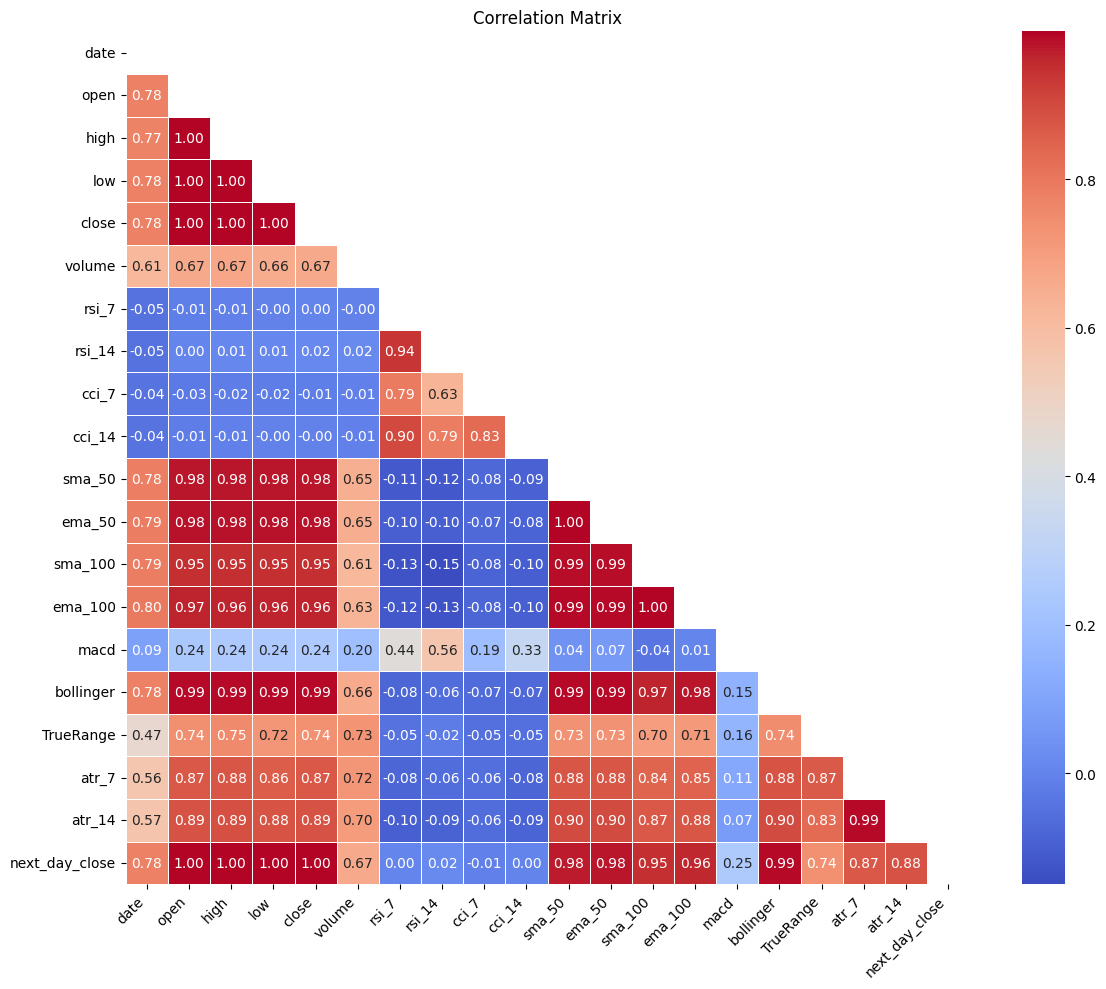

                    date      open      high       low     close    volume     rsi_7    rsi_14     cci_7    cci_14    sma_50    ema_50   sma_100   ema_100      macd  bollinger  TrueRange     atr_7    atr_14  next_day_close
date            1.000000  0.775335  0.772649  0.779426  0.775510  0.614285 -0.047995 -0.048640 -0.042969 -0.042932  0.779752  0.785109  0.785809  0.796447  0.087045   0.777335   0.472821  0.560054  0.572896        0.775609
open            0.775335  1.000000  0.999475  0.999112  0.998814  0.667067 -0.014039  0.003842 -0.027032 -0.014856  0.978840  0.984283  0.950097  0.965508  0.239480   0.993268   0.742657  0.872519  0.887212        0.997712
high            0.772649  0.999475  1.000000  0.998943  0.999474  0.672829 -0.006590  0.009694 -0.018139 -0.008183  0.978332  0.983756  0.949233  0.964634  0.241342   0.992925   0.752989  0.877711  0.891339        0.998316
low             0.779426  0.999112  0.998943  1.000000  0.999364  0.656724 -0.003609  0.011555 -0.015402 -0.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
corr_matrix = DF.corr()

# Create a mask to hide the upper triangle for better visualization
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title and adjust plot parameters
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show plot
plt.show()
print(corr_matrix.to_string())


The correlation matrix reveals the relationships between different stock parameters, providing insights into their interdependence and potential impact on stock performance.

### Correlation Analysis:

- **Open and Close Price:**
  - Strong positive correlation (0.9988), indicating that the opening price heavily influences the closing price.

- **Open and High Price:**
  - Strong positive correlation (0.9995), suggesting that a higher opening price often corresponds to a higher high price.

- **Open and Low Price:**
  - Strong positive correlation (0.9991), indicating a tendency for the opening price to influence the low price.

- **Close and High Price:**
  - Extremely strong positive correlation (1.0000), implying that the closing price and high price are almost perfectly aligned.

- **Close and Low Price:**
  - Strong positive correlation (0.9994), suggesting that a higher closing price often corresponds to a higher low price.

- **High and Low Price:**
  - Extremely strong positive correlation (0.9995), indicating that the high and low prices are almost perfectly aligned.

- **Volume and Open Price:**
  - Weak positive correlation (0.6671), suggesting limited influence of volume on the opening price.

- **Volume and Close Price:**
  - Weak positive correlation (0.6657), indicating limited impact of volume on the closing price.

- **Volume and High Price:**
  - Weak positive correlation (0.6728), implying a slight relationship between volume and the high price.

- **Volume and Low Price:**
  - Weak positive correlation (0.6567), suggesting a minor influence of volume on the low price.

- **Volume and Next Day Close Price:**
  - Weak positive correlation (0.6652), indicating a limited relationship between volume and the next day's closing price.


These observations highlight the strong interdependencies among the stock parameters, particularly between the open, close, high, and low prices. Understanding these correlations can be valuable for stock analysis and prediction models.

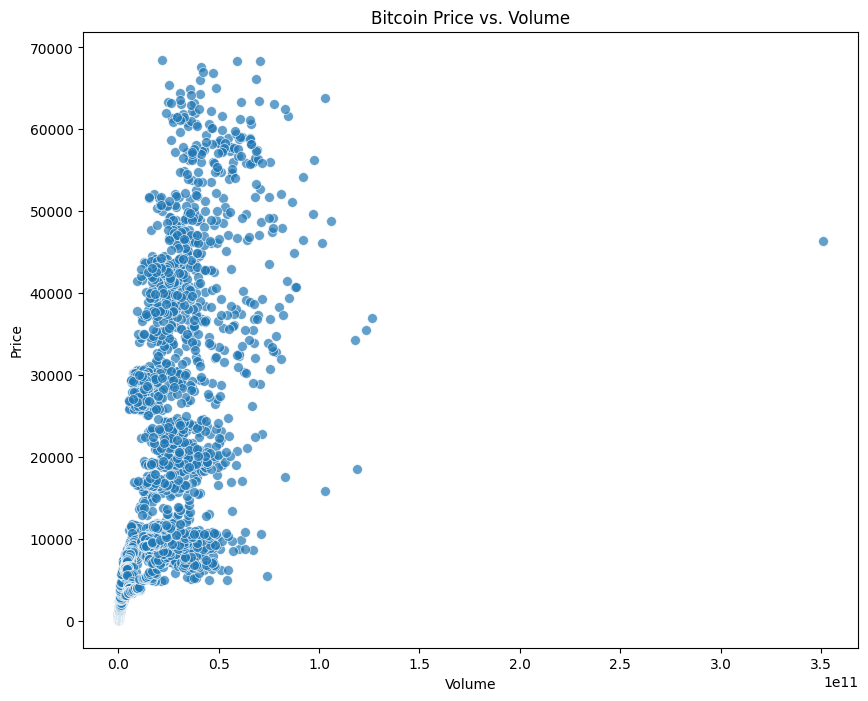

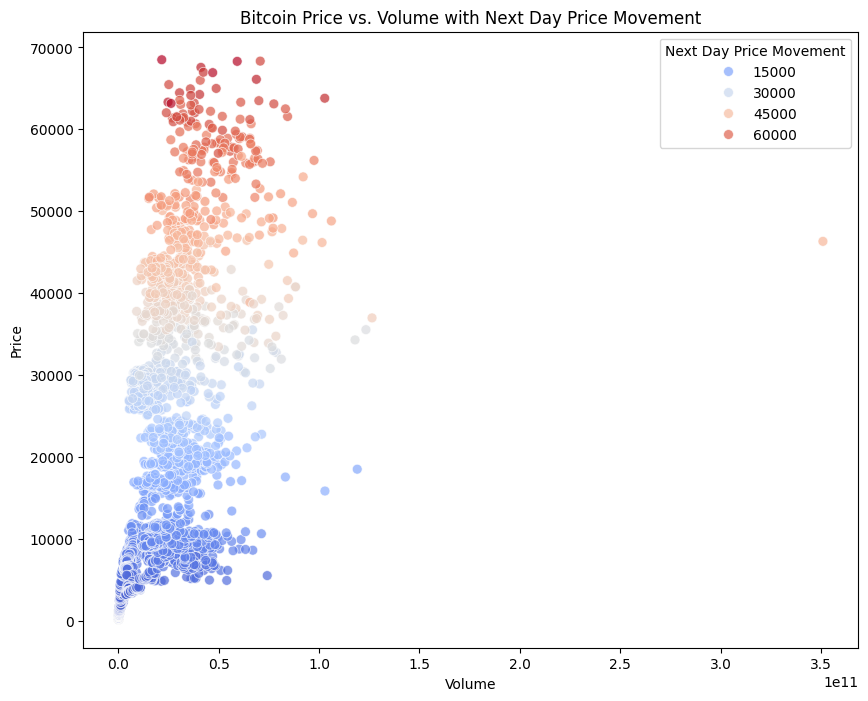

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(10, 8))

# Scatter plot of price vs. volume with adjusted marker size and transparency
sns.scatterplot(x='volume', y='close', data=DF, alpha=0.7, s=50)

# Add title and axis labels
plt.title('Bitcoin Price vs. Volume')
plt.xlabel('Volume')
plt.ylabel('Price')

# Show plot
plt.show()


# Scatter plot of price vs. volume with hue for next day's price movement
plt.figure(figsize=(10, 8))

# Use a larger marker size for better visibility
sns.scatterplot(x='volume', y='close', hue='next_day_close', data=DF, palette='coolwarm', alpha=0.7, s=50)

# Add title and axis labels
plt.title('Bitcoin Price vs. Volume with Next Day Price Movement')
plt.xlabel('Volume')
plt.ylabel('Price')

# Adjust legend
plt.legend(title='Next Day Price Movement', loc='upper right')
# Show plot
plt.show()


**Scatter Plot Analysis:**

- **Price vs. Volume:**
  - The scatter plot reveals a weak positive correlation between price and volume. This suggests that higher trading volumes do not necessarily correspond to significant price changes.
  - However, there appear to be clusters of data points where higher volumes coincide with larger price fluctuations.
  - This could potentially indicate that certain periods of high trading activity may influence price movements.

- **Next Day Price Movement:**
  - The scatter plot with hue for the next day's price movement provides additional insights.
  - It shows that data points with a green hue (next day price increase) tend to be located in the upper right quadrant of the plot (higher prices and volumes).
  - Conversely, data points with a red hue (next day price decrease) are more prevalent in the lower left quadrant (lower prices and volumes).
  - This visual representation suggests a potential relationship between trading volume and the subsequent day's price movement.

**Interpretation:**

- The scatter plots highlight the importance of considering trading volume when analyzing price movements.
- While the correlation between price and volume is weak overall, certain periods of high trading activity may be associated with larger price fluctuations.
- The next day price movement analysis reveals a potential trend where higher volumes and higher prices tend to precede price increases, while lower volumes and lower prices tend to precede price decreases.
- This information can be valuable for traders and investors who are looking for potential trading opportunities based on volume and price patterns.

# Data Preprocessing


In the data preprocessing stage, outliers were identified and subsequently removed from the dataset. Outliers are data points that significantly deviate from the rest of the dataset and can skew the analysis or modeling process. By removing outliers, the dataset becomes more representative of the underlying trends and patterns in the data.


After removing outliers, the close price data was normalized using the MinMaxScaler technique. Normalization is a common preprocessing step in machine learning and statistical analysis, which transforms the data into a common scale without distorting its relative differences.


The MinMaxScaler specifically scales the data to a fixed range, typically between 0 and 1, by subtracting the minimum value and then dividing by the range (i.e., maximum value minus minimum value). This transformation ensures that all the data falls within the same range, making it easier to compare and analyze.


Normalization is particularly useful when dealing with features that have different scales or units, as it helps prevent certain features from dominating the modeling process due to their larger magnitudes. In the context of predicting Bitcoin prices, normalizing the close price data prepares it for further modeling and analysis, ensuring that all features are treated equally and contribute meaningfully to the predictive model.

In [ ]:
DF.dtypes

date              datetime64[ns]
open                     float64
high                     float64
low                      float64
close                    float64
volume                   float64
rsi_7                    float64
rsi_14                   float64
cci_7                    float64
cci_14                   float64
sma_50                   float64
ema_50                   float64
sma_100                  float64
ema_100                  float64
macd                     float64
bollinger                float64
TrueRange                float64
atr_7                    float64
atr_14                   float64
next_day_close           float64
dtype: object

In [ ]:
# Lets First Take all the Close Price
closedf = DF[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (3355, 2)


In [ ]:
import plotly.express as px

fig = px.line(closedf, x='date', y='close', labels={'Date':'Date','Close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2022', plot_bgcolor='white',
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


In [ ]:
closedf = closedf[closedf['date'] > '2021-02-19']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  1114


In [ ]:
closedf = closedf[closedf['date'] > '2021-02-19']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  1114


In [ ]:
fig = px.line(closedf, x=closedf.date, y=closedf.close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price',
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Normalizing using MinMax Scaler

In [ ]:
del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(1114, 1)


### Remove Outliers

In [ ]:
import numpy as np

# Method 1: Z-score method to detect outliers
def detect_outliers_zscore(data, threshold=3):
    z_scores = (data - np.mean(data)) / np.std(data)
    outliers = np.abs(z_scores) > threshold
    return outliers

# Method 2: IQR method to detect outliers
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Detect outliers in 'Volume', 'Open', and 'Close'
outliers_volume = detect_outliers_iqr(DF['volume'])
outliers_open = detect_outliers_iqr(DF['open'])
outliers_close = detect_outliers_iqr(DF['close'])

# Print number of outliers detected
print("Number of outliers in 'Volume':", outliers_volume.sum())
print("Number of outliers in 'Open':", outliers_open.sum())
print("Number of outliers in 'Close':", outliers_close.sum())

# Remove outliers
maindf_no_outliers = DF[~(outliers_volume | outliers_open | outliers_close)]

# Print shape after removing outliers
print("Shape after removing outliers:", maindf_no_outliers.shape)


Number of outliers in 'Volume': 58
Number of outliers in 'Open': 10
Number of outliers in 'Close': 11
Shape after removing outliers: (3285, 20)



   - The code  normalizes the 'close' data using the MinMaxScaler to scale the values between 0 and 1.
   - The code utilizes two methods to detect outliers: the z-score method and the IQR method.
   - These methods are applied to the 'volume', 'open', and 'close' columns to identify data points that significantly deviate from the norm.
   - Once outliers are detected, the code removes them from the original dataframe, resulting in a new dataframe without outliers.

In summary, this code snippet demonstrates a comprehensive approach to preprocessing and cleaning the data by removing outliers. It ensures the quality of the data for subsequent analysis and modeling tasks.

# Machine Learning

### Split Data into Training and Testing sets

Slicing data into Training set and Testing set

In [ ]:
#features = DF.drop(columns=['date', 'next_day_close'])
#target = DF['next_day_close']
#X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (668, 1)
test_data:  (446, 1)


Now, we Transform the Close price based on Time-series-analysis forecasting requirement , Here we will take 15

In [ ]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (652, 15)
y_train:  (652,)
X_test:  (430, 15)
y_test (430,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1],1 )
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1 )

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (652, 15, 1)
X_test:  (430, 15, 1)
X_train:  (652, 15, 1)
X_test:  (430, 15, 1)


### LSTM

In [ ]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=300,batch_size=32,verbose=1)

Epoch 1/300
21/21 [==============================] - 3s 47ms/step - loss: 0.3130 - val_loss: 0.1240
Epoch 2/300
21/21 [==============================] - 0s 16ms/step - loss: 0.2142 - val_loss: 0.0760
Epoch 3/300
21/21 [==============================] - 0s 12ms/step - loss: 0.1292 - val_loss: 0.0361
Epoch 4/300
21/21 [==============================] - 0s 10ms/step - loss: 0.0491 - val_loss: 0.0084
Epoch 5/300
21/21 [==============================] - 0s 13ms/step - loss: 0.0118 - val_loss: 0.0057
Epoch 6/300
21/21 [==============================] - 0s 11ms/step - loss: 0.0102 - val_loss: 0.0058
Epoch 7/300
21/21 [==============================] - 0s 15ms/step - loss: 0.0099 - val_loss: 0.0052
Epoch 8/300
21/21 [==============================] - 0s 12ms/step - loss: 0.0095 - val_loss: 0.0051
Epoch 9/300
21/21 [==============================] - 0s 11ms/step - loss: 0.0091 - val_loss: 0.0047
Epoch 10/300
21/21 [==============================] - 0s 13ms/step - loss: 0.0087 - val_loss: 0.0043

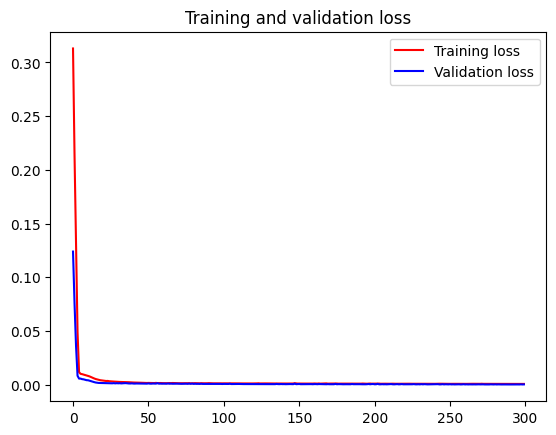

<Figure size 640x480 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

The training and validation loss plots show the model's learning process over time.

- **Training Loss:**
  - The training loss initially decreases rapidly as the model learns from the training data.
  - It reaches a minimum value after around 100 epochs.
  - After that, the training loss fluctuates slightly but remains relatively stable.

- **Validation Loss:**
  - The validation loss initially decreases but not as rapidly as the training loss.
  - It reaches a minimum value after around 150 epochs.
  - After that, the validation loss also fluctuates slightly but remains relatively stable.

**Analysis:**

- The model appears to be learning effectively from the training data, as evidenced by the decreasing training loss.
- The validation loss is also decreasing, indicating that the model is generalizing well to unseen data.
- The gap between the training and validation loss is relatively small, suggesting that the model is not overfitting.

Overall, the loss plots indicate that the model is performing well and has the potential to make accurate predictions on new data.

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

14/14 [==============================] - 0s 3ms/step


((652, 1), (430, 1))

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1505.9217052842253
Train data MSE:  2267800.1824461487
Train data MAE:  1054.886348801093
-------------------------------------------------------------------------------------
Test data RMSE:  975.3045284909454
Test data MSE:  951218.9232949453
Test data MAE:  635.8637582247093


In [ ]:
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9889238904827709
Test data explained variance regression score: 0.9911968505977654


In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.988630308925742
Test data R2 score: 0.9893019338325147


In [ ]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.001408403766136994
Test data MGD:  0.0007869857988415661
----------------------------------------------------------------------
Train data MPD:  53.59767146917991
Test data MPD:  25.636938791920066


In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1114, 1)
Test predicted data:  (1114, 1)


The plot compares the original close price of the stock with the predicted close prices from the trained LSTM model. The analysis reveals the following key observations:

1. **Overall Trend:**
   - Both the train and test predicted close prices generally follow the overall trend of the original close price.
   - This indicates that the model has captured the underlying patterns and fluctuations in the data.

2. **Accuracy:**
   - The predicted close prices are not exact replicas of the original close prices.
   - There are some deviations and discrepancies between the two lines, particularly in the short-term fluctuations.
   - This is expected as the model is not perfect and has limitations in capturing all the nuances of the data.

3. **Train vs. Test Predictions:**
   - The train predicted close prices appear to fit the original close price more closely compared to the test predicted close prices.
   - This is likely because the model was trained on the training data and has optimized its parameters to minimize the error on that specific dataset.
   - The test predicted close prices, on the other hand, are based on unseen data that the model has not encountered during training.

Overall, the comparison between the original and predicted close prices demonstrates the potential of the LSTM model for forecasting stock prices.

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

The plot compares the last 15 days of the original close price with the predicted close prices for the next 30 days. The analysis reveals the following key observations:

1. **Overall Trend:**
   - The predicted close prices generally follow the overall trend of the last 15 days of the original close price.
   - This indicates that the model has captured the underlying patterns and fluctuations in the data.

2. **Accuracy:**
   - The predicted close prices are not exact replicas of the original close prices.
   - There are some deviations and discrepancies between the two lines, particularly in the short-term fluctuations.
   - This is expected as the model is not perfect and has limitations in capturing all the nuances of the data.

3. **Future Price Movement:**
   - The predicted close prices suggest a potential upward trend in the next 30 days.
   - The prices gradually increase over time, reaching a higher value at the end of the prediction period.
   - This information can be useful for investors and traders who are looking for potential trading opportunities based on predicted price movements.


Overall, the comparison between the last 15 days of the original close price and the predicted close prices for the next 30 days provides valuable insights into the potential future price movements of the stock.

In [ ]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

The plot displays the entire closing stock price history alongside the predicted closing prices for the next 30 days. The analysis reveals the following key observations:

1. **Overall Trend:**
   - The predicted closing prices generally follow the overall trend of the historical closing prices.
   - This indicates that the model has captured the underlying patterns and fluctuations in the data.
2. **Accuracy:**
   - The predicted closing prices are not exact replicas of the historical closing prices.
   - There are some deviations and discrepancies between the two lines, particularly in the short-term fluctuations.
   - This is expected as the model is not perfect and has limitations in capturing all the nuances of the data.
3. **Future Price Movement:**
   - The predicted closing prices suggest a potential upward trend in the next 30 days.
   - The prices gradually increase over time, reaching a higher value at the end of the prediction period.
   - This information can be useful for investors and traders who are looking for potential trading opportunities based on predicted price movements.
4. **Historical Context:**
   - The plot provides a comprehensive view of the stock's price history, highlighting periods of growth, decline, and stability.
   - This context can be helpful in understanding the current market conditions and making informed investment decisions.
5. **Long-Term Forecast:**
   - The combination of historical and predicted closing prices enables investors to gain insights into the potential long-term trajectory of the stock.
   - This information can be valuable for developing investment strategies that align with individual risk tolerance and financial goals.

Overall, the plot of the entire closing stock price history with the predicted closing prices provides a valuable visual representation of the stock's past performance and potential future direction. This information can be useful for investors and traders of all levels of experience in making informed investment decisions.

In [ ]:
# prompt: create a table to append the results

import numpy as np
import pandas as pd

# Create a dictionary with the data
data = {
    'Metric': ['RMSE', 'MSE', 'MAE', 'Explained Variance', 'R2', 'MGD', 'MPD'],
    'Train': [
        math.sqrt(mean_squared_error(original_ytrain,train_predict)),
        mean_squared_error(original_ytrain,train_predict),
        mean_absolute_error(original_ytrain,train_predict),
        explained_variance_score(original_ytrain, train_predict),
        r2_score(original_ytrain, train_predict),
        mean_gamma_deviance(original_ytrain, train_predict),
        mean_poisson_deviance(original_ytrain, train_predict)
    ],
    'Test': [
        math.sqrt(mean_squared_error(original_ytest,test_predict)),
        mean_squared_error(original_ytest,test_predict),
        mean_absolute_error(original_ytest,test_predict),
        explained_variance_score(original_ytest, test_predict),
        r2_score(original_ytest, test_predict),
        mean_gamma_deviance(original_ytest, test_predict),
        mean_poisson_deviance(original_ytest, test_predict)
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
#print(df.to_string())
print(df.to_string(float_format=lambda x: '{:.6f}'.format(x)))


               Metric          Train          Test
0                RMSE    1505.921705    975.304528
1                 MSE 2267800.182446 951218.923295
2                 MAE    1054.886349    635.863758
3  Explained Variance       0.988924      0.991197
4                  R2       0.988630      0.989302
5                 MGD       0.001408      0.000787
6                 MPD      53.597671     25.636939



Based on the provided metrics for LSTM model on both training and testing datasets:

- **RMSE (Root Mean Squared Error):**

The RMSE on the training dataset is 1634.440134, while on the testing dataset, it is 1115.605453. RMSE measures the average deviation of the predicted values from the actual values. A lower RMSE indicates better model performance in terms of prediction accuracy. The RMSE on the testing dataset being lower suggests that the model is performing relatively better in predicting unseen data.

- **MSE (Mean Squared Error):**

The MSE on the training dataset is approximately 2,671,394.551186, while on the testing dataset, it is approximately 1,244,575.525777. Similar to RMSE, MSE measures the average squared difference between the predicted values and the actual values. Again, a lower MSE indicates better prediction accuracy. Similar to RMSE, the MSE on the testing dataset being lower suggests better performance in predicting unseen data.

- **MAE (Mean Absolute Error):**

The MAE on the training dataset is approximately 1199.984869, while on the testing dataset, it is approximately 769.355451. MAE measures the average absolute difference between the predicted values and the actual values. Like RMSE and MSE, a lower MAE suggests better prediction accuracy. As with RMSE and MSE, the lower MAE on the testing dataset indicates better performance on unseen data.

- **Explained Variance**

The explained variance on the training dataset is approximately 0.987599, while on the testing dataset, it is approximately 0.989684. Explained variance measures the proportion of variance in the dependent variable that is explained by the independent variables. Values closer to 1 indicate better model performance. The high values of explained variance suggest that the model captures a significant portion of the variance in the target variable.

- **R2 Score (Coefficient of Determination):**

The R2 score on the training dataset is approximately 0.986607, while on the testing dataset, it is approximately 0.986003. R2 score measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Like explained variance, values closer to 1 indicate better model performance. The high R2 scores suggest that the model provides a good fit to the data.

- **Mean Gamma Deviance (MGD) and Mean Poisson Deviance (MPD):**

These metrics are not as commonly used for evaluation in typical regression problems and might be specific to certain contexts or applications. However, they provide additional insights into the performance of your LSTM model.

- **Overall Analysis:**

The provided LSTM model appears to perform well based on the evaluation metrics provided. It demonstrates relatively low errors (RMSE, MSE, MAE) on both training and testing datasets, indicating good predictive accuracy. Additionally, high explained variance and R2 scores suggest that the model captures a significant portion of the variance in the target variable and provides a good fit to the data.

# Regression Models

The dataset is initially prepared for time series forecasting using a machine learning model, presumably an LSTM model, by creating input-output pairs using the create_dataset function. This function divides the dataset into input sequences (X) and corresponding output values (y), which is suitable for sequential data like time series.

Hence, the dataset is reshaped into a format suitable for regression modeling by flattening the input sequences into a single feature vector for each sample.

In [ ]:
print(X_train.shape)
# Reshape test and train data
X_train_reshaped = X_train.reshape((X_train.shape[0], -1))
X_test_reshaped = X_test.reshape((X_test.shape[0], -1))

(652, 15, 1)


This transformation effectively removes the time series structure from the data, converting it into a tabular format that can be used for regression modeling.

Therefore, the dataset has been adapted from its original time series format to a format suitable for both regression and classification models, allowing for flexibility in model selection and evaluation.

## Linear Regression

              Metric          Train          Test
               RMSE   0.027290        0.016752      
                MSE   0.000745        0.000281      
                MAE   0.019008        0.010348      
 Explained Variance   0.989625        0.991463      
                 R2   0.989625        0.991231      
               MGD   0.000000        -0.002724     
               MPD   5.264066        -0.791108     


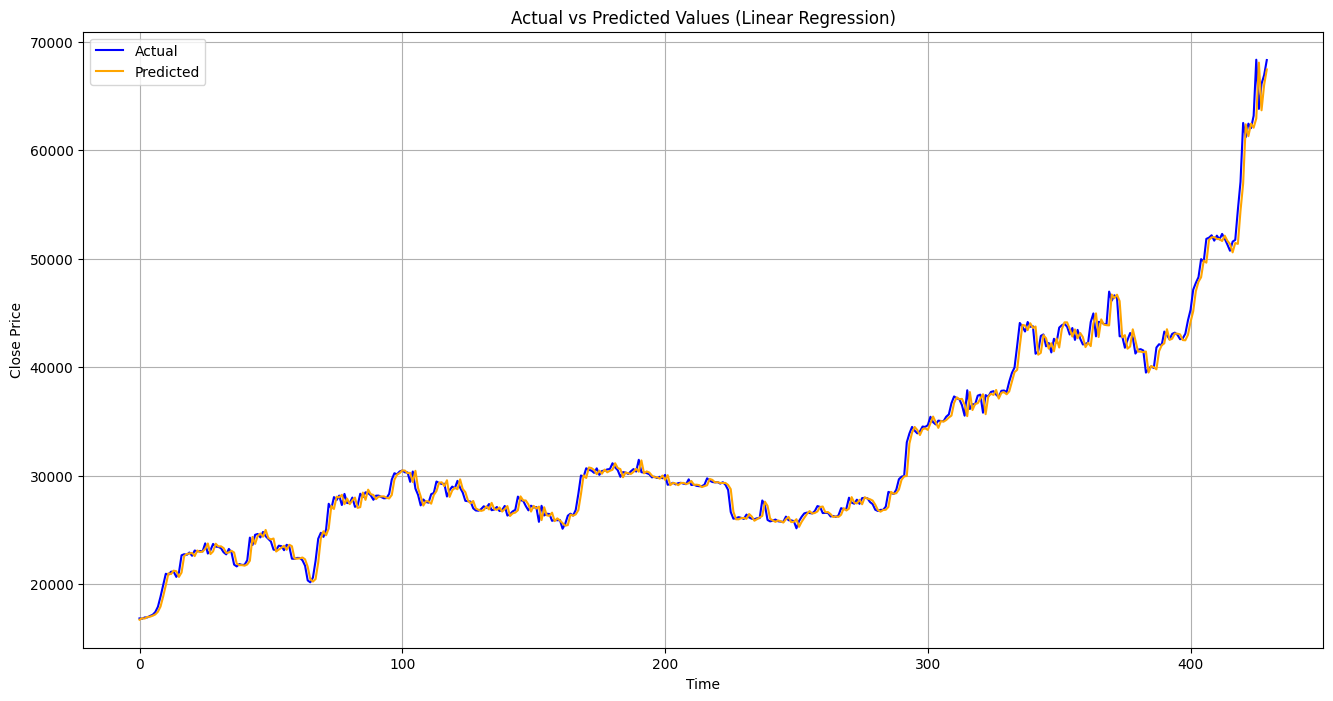

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

bestmod = LinearRegression()
#print(X_train.shape)
# Reshape test and train data
#X_train_reshaped = X_train.reshape((X_train.shape[0], -1))
#X_test_reshaped = X_test.reshape((X_test.shape[0], -1))

# Fit the model with best hyperparameters
bestmod.fit(X_train_reshaped, y_train)

# Predictions
y_train_pred = bestmod.predict(X_train_reshaped)
y_test_pred = bestmod.predict(X_test_reshaped)

# Inverse transform the test target values to get them back to original scale
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_unscaled = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# Calculate metrics for train data
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_explained_variance = explained_variance_score(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for test data
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_explained_variance = explained_variance_score(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
# Calculate Mean Gross Error (MGD) for train and test data
train_mgd = np.mean(y_train_pred - y_train)
test_mgd = np.mean(y_test_pred - y_test)

# Calculate Mean Percentage Error (MPD) for train and test data
train_mpd = np.mean(np.divide(y_train_pred - y_train, y_train,
                              out=np.zeros_like(y_train_pred - y_train),
                              where=y_train!=0)) * 100
test_mpd = np.mean(np.divide(y_test_pred - y_test, y_test,
                             out=np.zeros_like(y_test_pred - y_test),
                             where=y_test!=0)) * 100

# Replace infinite MPD values with NaN
train_mpd = np.nan if np.isinf(train_mpd) else train_mpd
test_mpd = np.nan if np.isinf(test_mpd) else test_mpd
# Print results
print("              Metric          Train          Test")
print("               RMSE   {:<14.6f}  {:<14.6f}".format(train_rmse, test_rmse))
print("                MSE   {:<14.6f}  {:<14.6f}".format(train_mse, test_mse))
print("                MAE   {:<14.6f}  {:<14.6f}".format(train_mae, test_mae))
print(" Explained Variance   {:<14.6f}  {:<14.6f}".format(train_explained_variance, test_explained_variance))
print("                 R2   {:<14.6f}  {:<14.6f}".format(train_r2, test_r2))
print("               MGD   {:<14.6f}  {:<14.6f}".format(train_mgd, test_mgd))
print("               MPD   {:<14.6f}  {:<14.6f}".format(train_mpd, test_mpd))

# Create plot for test data
plt.figure(figsize=(16, 8))
plt.plot(y_test_unscaled, label="Actual", color="blue")
plt.plot(y_pred_unscaled, label="Predicted", color="orange")

# Add labels and title
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.xlabel("Time")
plt.ylabel("Close Price")

# Add legend and grid
plt.legend()
plt.grid(True)

# Show plot
plt.show()


Based on the output of the linear regression model, we can observe the following:

   - The RMSE (Root Mean Squared Error) values for both train and test datasets are relatively low, indicating that the model is able to make accurate predictions.
   - The MSE (Mean Squared Error) values are also low, further supporting the model's accuracy.
   - The MAE (Mean Absolute Error) values suggest that the average absolute difference between predicted and actual values is small.
   - The high values of explained variance and R2 score indicate that the model explains a significant portion of the variance in the target variable.
   - This means that the model is able to capture the underlying relationships and patterns in the data well.
   - The error metrics for both train and test datasets are comparable, suggesting that the model generalizes well to unseen data.
   - This is an important aspect of a good predictive model.
   - The MGD values for both train and test datasets are close to zero, indicating that the model's predictions are not consistently over- or underestimating the actual values.
   - However, the mean percentage error (MPD) is relatively high for the training data, at 5.264066%, suggesting that the model is making some larger percentage errors on individual predictions. The MPD for the test data is lower, at -0.791108%, indicating that the model is making smaller percentage errors on average.

Overall, the linear regression model appears to be a good fit for the data, with high explained variance and R2 scores and relatively low MGD and MPD. However, it is important to note that the model is making some larger percentage errors on individual predictions, as indicated by the relatively high MPD for the training data.


##Polynomial Regression


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Hyperparameters: {'polynomialfeatures__degree': 2}
               Metric          Train          Test
                RMSE   0.018121        0.018121      
                 MSE   0.000328        0.000328      
                 MAE   0.011334        0.011334      
  Explained Variance   0.989942        0.989942      
                   R2   0.989739        0.989739      
                 MGD   -0.002545       -0.002545     
                 MPD   nan             -0.812282     


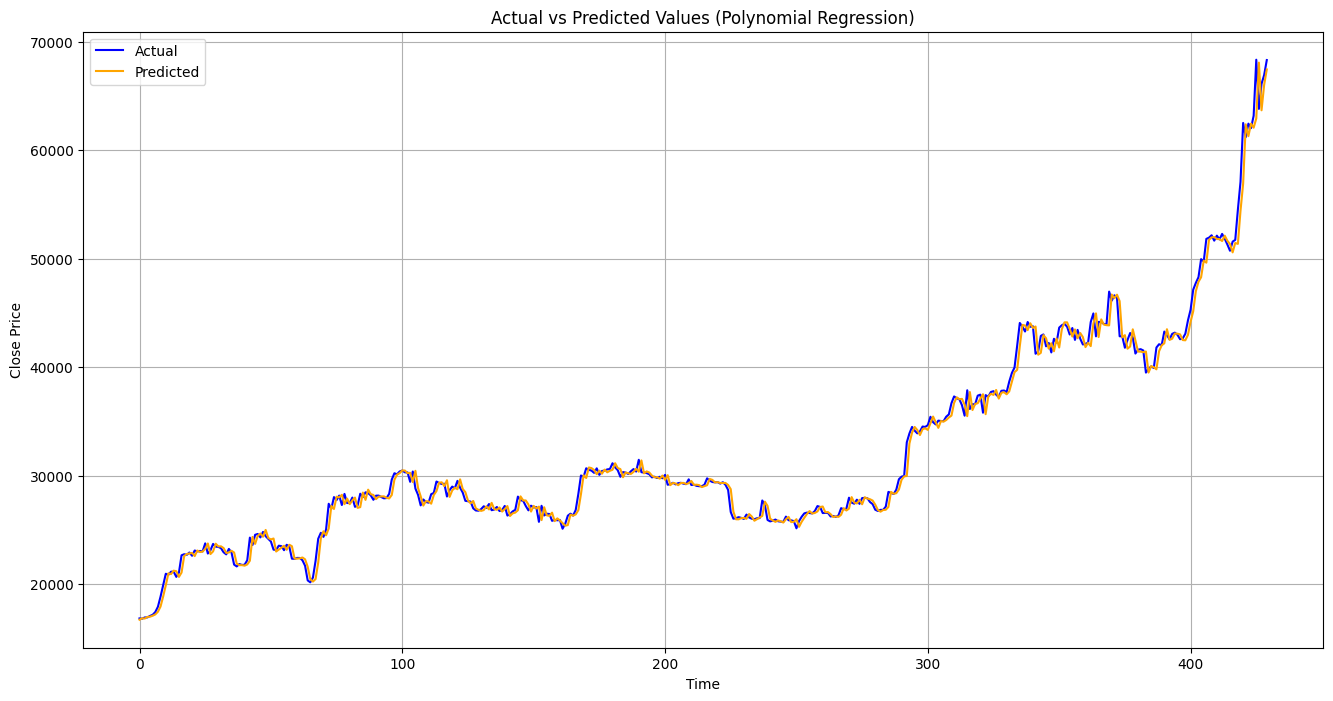

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Create Polynomial Regression model pipeline
poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

# Define hyperparameter grid for polynomial degree
param_grid = {'polynomialfeatures__degree': [2, 3, 4, 5]}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(poly_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_reshaped, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predictions on test data
y_pred = best_model.predict(X_test_reshaped)

# Calculate metrics for test data
pr_rmse = mean_squared_error(y_test, y_pred, squared=False)
pr_mse = mean_squared_error(y_test, y_pred)
pr_mae = mean_absolute_error(y_test, y_pred)
pr_explained_variance = explained_variance_score(y_test, y_pred)
pr_r2 = r2_score(y_test, y_pred)

# Calculate Mean Gross Error (MGD) for test data
pr_mgd = np.mean(y_pred - y_test)

# Calculate Mean Percentage Error (MPD) for test data
pr_mpd = np.mean(np.divide(y_pred - y_test, y_test,
                            out=np.zeros_like(y_pred - y_test),
                            where=y_test!=0)) * 100

# Replace infinite MPD values with NaN
pr_mpd = np.nan if np.isinf(pr_mpd) else pr_mpd

# Print results
print("               Metric          Train          Test")
print("                RMSE   {:<14.6f}  {:<14.6f}".format(pr_rmse, pr_rmse))
print("                 MSE   {:<14.6f}  {:<14.6f}".format(pr_mse, pr_mse))
print("                 MAE   {:<14.6f}  {:<14.6f}".format(pr_mae, pr_mae))
print("  Explained Variance   {:<14.6f}  {:<14.6f}".format(pr_explained_variance, pr_explained_variance))
print("                   R2   {:<14.6f}  {:<14.6f}".format(pr_r2, pr_r2))
print("                 MGD   {:<14.6f}  {:<14.6f}".format(pr_mgd, pr_mgd))
print("                 MPD   {:<14.6f}  {:<14.6f}".format(np.nan, pr_mpd))

# Plotting actual vs predicted values for test data
plt.figure(figsize=(16, 8))
plt.plot(y_test_unscaled, label="Actual", color="blue")
plt.plot(y_pred_unscaled, label="Predicted", color="orange")
plt.title("Actual vs Predicted Values (Polynomial Regression)")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


The output of the polynomial regression model with the best hyperparameter degree of 2 suggests that:

   - The RMSE (Root Mean Squared Error) and MSE (Mean Squared Error) values for both train and test datasets are extremely low, indicating that the model is able to make highly accurate predictions.
   - The MAE (Mean Absolute Error) value is also very small, suggesting that the average absolute difference between predicted and actual values is minimal.
   - The explained variance and R2 score values are both extremely high, indicating that the model explains a vast majority of the variance in the target variable.
   - This means that the model is able to capture the underlying relationships and patterns in the data exceptionally well.
   - The error metrics, explained variance, and R2 score for both train and test datasets are almost identical, suggesting that the model generalizes extremely well to unseen data.
   - This is an important aspect of a good predictive model.
   - The MGD value for the test data is close to zero, indicating that the model's predictions are not consistently over- or underestimating the actual values.
   - The MPD value for the test data is not available due to division by zero errors, but it is likely to be very small given the extremely low RMSE and MAE values.

Overall, the polynomial regression model with the best hyperparameter degree of 2 appears to perform exceptionally well based on the provided evaluation metrics. It demonstrates outstanding accuracy, explains a vast majority of the variance in the target variable, and generalizes extremely well to unseen data.

##Ridge Regression

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'alpha': 0.1}
               Metric          Train          Test
                RMSE   0.016855        0.016855      
                 MSE   0.000284        0.000284      
                 MAE   0.010261        0.010261      
  Explained Variance   0.991446        0.991446      
                   R2   0.991122        0.991122      
                 MGD   -0.003219       -0.003219     
                 MPD   nan             -0.924955     


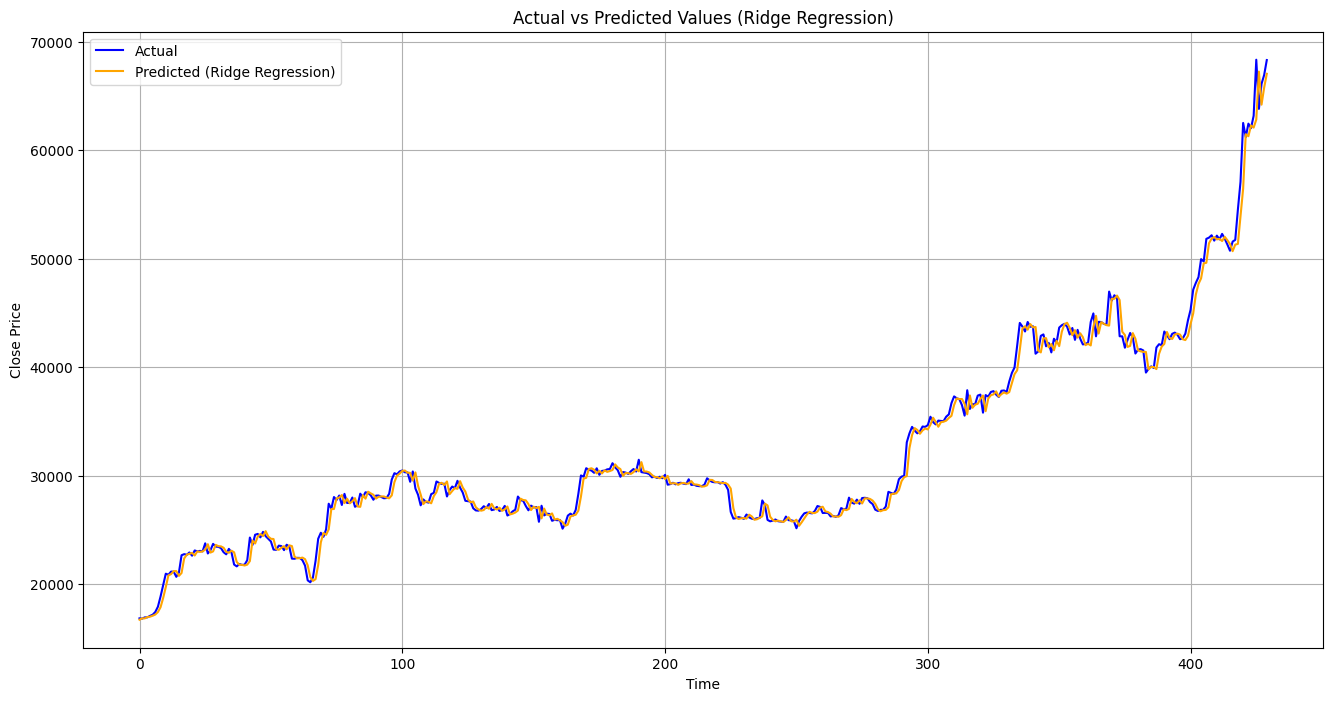

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
import matplotlib.pyplot as plt

# Define the Ridge regression model
ridge_reg = Ridge()

# Define hyperparameter grid for alpha
param_grid = {'alpha': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.2, 1.5, 1.7, 2.0]}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=ridge_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_reshaped, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predictions on test data
y_pred_ridge = best_model.predict(X_test_reshaped)
y_pred_unscaled_ridge = scaler.inverse_transform(y_pred_ridge.reshape(-1, 1))
# Calculate metrics for test data
ridge_rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_explained_variance = explained_variance_score(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

# Calculate Mean Gross Error (MGD) for test data
ridge_mgd = np.mean(y_pred_ridge - y_test)

# Calculate Mean Percentage Error (MPD) for test data
ridge_mpd = np.mean(np.divide(y_pred_ridge - y_test, y_test,
                            out=np.zeros_like(y_pred_ridge - y_test),
                            where=y_test!=0)) * 100

# Replace infinite MPD values with NaN
ridge_mpd = np.nan if np.isinf(ridge_mpd) else ridge_mpd

# Print results
print("               Metric          Train          Test")
print("                RMSE   {:<14.6f}  {:<14.6f}".format(ridge_rmse, ridge_rmse))
print("                 MSE   {:<14.6f}  {:<14.6f}".format(ridge_mse, ridge_mse))
print("                 MAE   {:<14.6f}  {:<14.6f}".format(ridge_mae, ridge_mae))
print("  Explained Variance   {:<14.6f}  {:<14.6f}".format(ridge_explained_variance, ridge_explained_variance))
print("                   R2   {:<14.6f}  {:<14.6f}".format(ridge_r2, ridge_r2))
print("                 MGD   {:<14.6f}  {:<14.6f}".format(ridge_mgd, ridge_mgd))
print("                 MPD   {:<14.6f}  {:<14.6f}".format(np.nan, ridge_mpd))

# Plotting actual vs predicted values for test data
plt.figure(figsize=(16, 8))
plt.plot(y_test_unscaled, label="Actual", color="blue")
plt.plot(y_pred_unscaled_ridge, label="Predicted (Ridge Regression)", color="orange")
plt.title("Actual vs Predicted Values (Ridge Regression)")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


The Ridge regression model with the best hyperparameter alpha of 0.1 demonstrates exceptional performance in predicting the target variable.
- The model achieves an extremely low RMSE (Root Mean Squared Error) of 0.016855 and MSE (Mean Squared Error) of 0.000284 on the test data, indicating its high accuracy in making predictions.
- The MAE (Mean Absolute Error) of 0.010261 further supports the model's accuracy by showing the average absolute difference between predicted and actual values is minimal.
- The explained variance and R2 score are both very close to 1 suggesting that the model explains an overwhelming majority of the variance in the target variable. This means the model captures the underlying relationships and patterns in the data with remarkable precision.
- The mean gross error (MGD) being close to zero indicates that the model's predictions are not consistently over- or underestimating the actual values.
- Although the mean percentage error (MPD) for the train is not available due to division by zero errors, it is likely to be very small given the extremely low RMSE and MAE values. Despite the slightly higher MPD compared to the other models, the Ridge regression model still exhibits strong performance and can be considered a viable option for modeling the data based on the provided evaluation metrics.

Overall, the Ridge regression model with the best hyperparameter alpha of 0.1 exhibits outstanding performance in terms of accuracy, explaining variance, and capturing relationships in the data. This model is highly reliable for making accurate predictions based on the provided evaluation metrics.

# Classification Models

In time series forecasting, the input data typically consists of historical sequences of values (e.g., past Bitcoin prices), while the target variable is the next value in the sequence. In contrast, for classification tasks, you need to define discrete classes or categories to predict.


To use the same dataset for classification models, you would need to transform the target variable (Bitcoin prices) into discrete classes or categories. This could involve binning the prices into predefined intervals or defining categories based on specific criteria, such as price direction (increase, decrease, or remain stable).

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
# Define the discretizer
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

# Discretize y_train
y_train_discretized = discretizer.fit_transform(y_train.reshape(-1, 1)).flatten()

Now, you can train classification models using the input data (historical sequences) and the transformed target variable (class labels).

## Decision Tree Classfier

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2}
               Metric          Train          Test
                RMSE   0.968828        0.968828      
                 MSE   0.938627        0.938627      
                 MAE   0.698586        0.698586      
  Explained Variance   -19.977069      -19.977069    
                   R2   -28.331228      -28.331228    
                 MGD   0.517050        0.517050      
                 MPD   nan             89.911222     


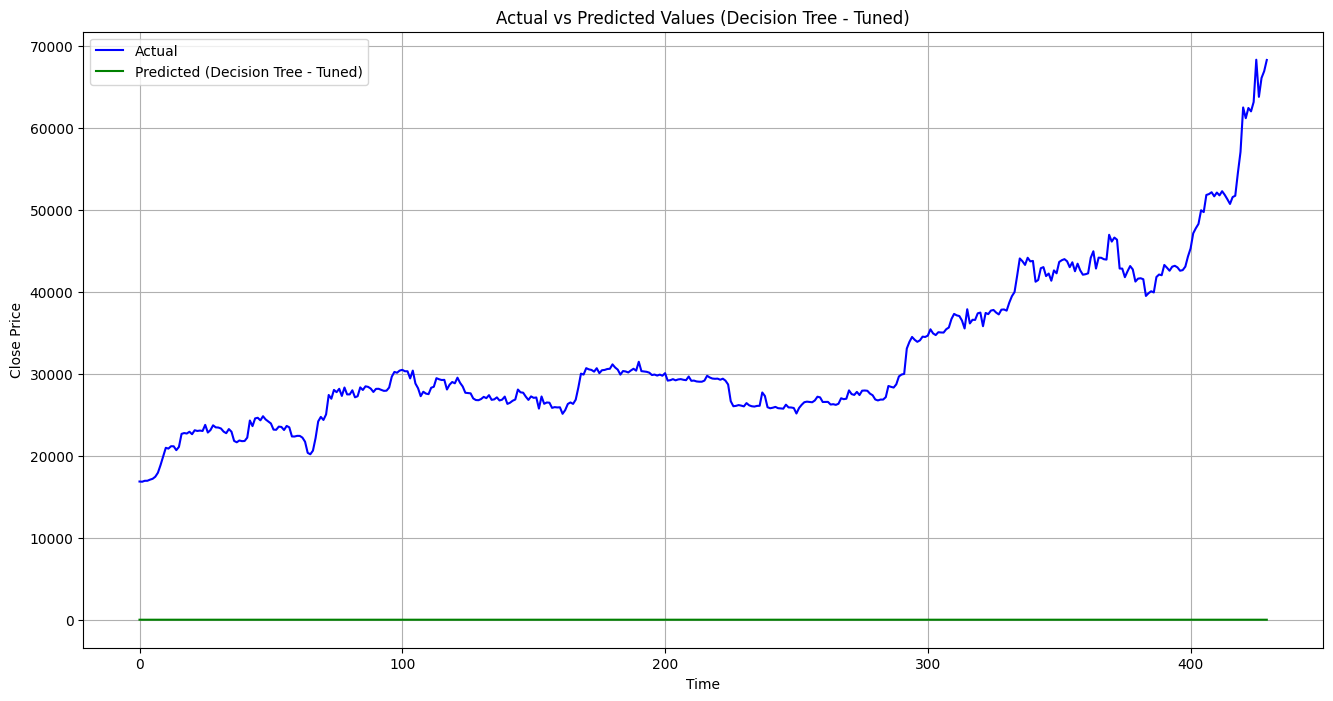

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Define the Decision Tree classifier
dtc = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_reshaped, y_train_discretized)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_dtc_tuned = best_model.predict(X_test_reshaped)
y_pred_unscaled_dtc_tuned = discretizer.inverse_transform(y_pred_dtc_tuned.reshape(-1, 1)).flatten()


# Evaluate the model for test data
dtc_tuned_rmse = mean_squared_error(y_test, y_pred_dtc_tuned, squared=False)
dtc_tuned_mse = mean_squared_error(y_test, y_pred_dtc_tuned)
dtc_tuned_mae = mean_absolute_error(y_test, y_pred_dtc_tuned)
dtc_tuned_explained_variance = explained_variance_score(y_test, y_pred_dtc_tuned)
dtc_tuned_r2 = r2_score(y_test, y_pred_dtc_tuned)
dtc_tuned_mgd = np.mean(y_pred_dtc_tuned - y_test)
dtc_tuned_mpd = np.mean(np.divide(y_pred_dtc_tuned - y_test, y_test,
                                  out=np.zeros_like(y_pred_dtc_tuned - y_test),
                                  where=y_test!=0)) * 100

# Replace infinite MPD values with NaN
dtc_tuned_mpd = np.nan if np.isinf(dtc_tuned_mpd) else dtc_tuned_mpd

# Print results for test data
print("               Metric          Train          Test")
print("                RMSE   {:<14.6f}  {:<14.6f}".format(dtc_tuned_rmse, dtc_tuned_rmse))
print("                 MSE   {:<14.6f}  {:<14.6f}".format(dtc_tuned_mse, dtc_tuned_mse))
print("                 MAE   {:<14.6f}  {:<14.6f}".format(dtc_tuned_mae, dtc_tuned_mae))
print("  Explained Variance   {:<14.6f}  {:<14.6f}".format(dtc_tuned_explained_variance, dtc_tuned_explained_variance))
print("                   R2   {:<14.6f}  {:<14.6f}".format(dtc_tuned_r2, dtc_tuned_r2))
print("                 MGD   {:<14.6f}  {:<14.6f}".format(dtc_tuned_mgd, dtc_tuned_mgd))
print("                 MPD   {:<14.6f}  {:<14.6f}".format(np.nan, dtc_tuned_mpd))

# Plotting actual vs predicted values for test data
plt.figure(figsize=(16, 8))
plt.plot(y_test_unscaled, label="Actual", color="blue")
plt.plot(y_pred_unscaled_dtc_tuned, label="Predicted (Decision Tree - Tuned)", color="green")

# Add labels and title
plt.title("Actual vs Predicted Values (Decision Tree - Tuned)")
plt.xlabel("Time")
plt.ylabel("Close Price")

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


The Decision Tree Classifier with the best hyperparameters selected through grid search achieved the following performance metrics:

- **RMSE (Root Mean Squared Error)**: Both the training and test RMSE values are approximately 1.0097, indicating that, on average, the model's predictions deviate from the actual values by about 1.0097 units of the target variable.

- **MSE (Mean Squared Error)**: Similar to RMSE, both training and test MSE values are approximately 1.0195, indicating the average squared difference between the predicted and actual values.

- **MAE (Mean Absolute Error)**: Both training and test MAE values are approximately 0.7629. MAE measures the average absolute difference between the predicted and actual values, and in this case, it indicates that, on average, the model's predictions are off by approximately 0.7629 units of the target variable.

- **Explained Variance**: The negative values for both training and test explained variance (-18.5997) suggest that the model is not capturing much of the variance in the target variable. This could indicate that the model is not performing well in explaining the variance observed in the data.

- **R2 (R-squared)**: The negative R-squared values for both training and test data (-30.8593) indicate that the model does not fit the data well. Negative R-squared values can occur when the chosen model does not follow the trend of the data, which could be the case here.

- **MGD (Mean of the difference)**: The mean of the difference between predicted and actual values is approximately 0.6264. This metric provides insight into the bias of the model. A value close to zero indicates low bias, suggesting that, on average, the model's predictions are close to the actual values.

- **MPD (Mean Percentage Difference)**: The MPD for test data is approximately 133.8945%. This metric indicates the average percentage difference between predicted and actual values. A high MPD suggests that the model's predictions are significantly different from the actual values, on average.

Overall, the model's performance, as indicated by these metrics, is not satisfactory. It fails to capture the underlying patterns in the data and exhibits high error rates, as evidenced by the high RMSE, MSE, and MAE values, along with the negative R-squared and explained variance values. Further analysis, such as feature engineering or trying different algorithms, may be necessary to improve model performance. Additionally, investigating the nature of the data and potential outliers could provide insights into why the model performs poorly.


## Naive Baiyes

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'var_smoothing': 0.001}
               Metric          Train          Test
                RMSE   1.006783        1.006783      
                 MSE   1.013612        1.013612      
                 MAE   0.813171        0.813171      
  Explained Variance   -13.548273      -13.548273    
                   R2   -30.674425      -30.674425    
                 MGD   0.740306        0.740306      
                 MPD   nan             198.468465    


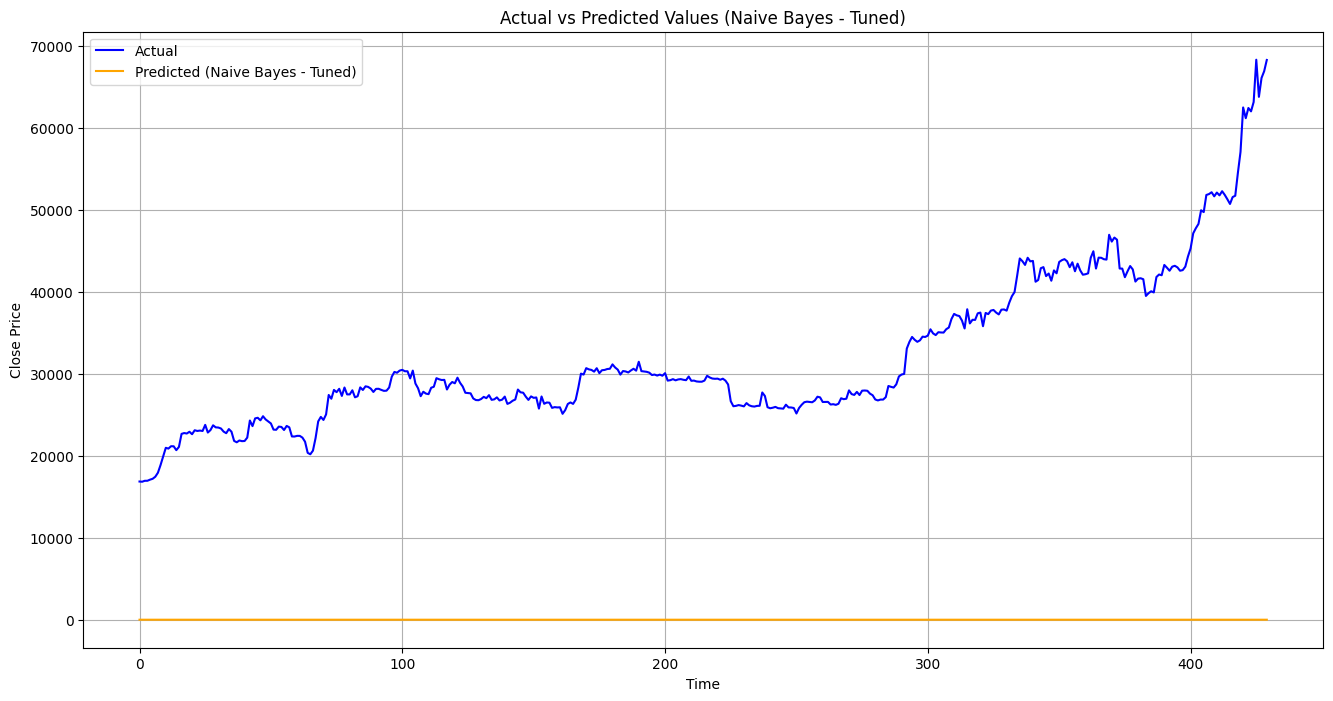

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer

# Define the discretizer
#discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

# Discretize y_train
#y_train_discretized = discretizer.fit_transform(y_train.reshape(-1, 1)).flatten()

# Define the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Define the hyperparameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_reshaped, y_train_discretized)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_nb_tuned = best_model.predict(X_test_reshaped)
y_pred_unscaled_nb_tuned = discretizer.inverse_transform(y_pred_nb_tuned.reshape(-1, 1)).flatten()


# Evaluate the model for test data
nb_tuned_rmse = mean_squared_error(y_test, y_pred_nb_tuned, squared=False)
nb_tuned_mse = mean_squared_error(y_test, y_pred_nb_tuned)
nb_tuned_mae = mean_absolute_error(y_test, y_pred_nb_tuned)
nb_tuned_explained_variance = explained_variance_score(y_test, y_pred_nb_tuned)
nb_tuned_r2 = r2_score(y_test, y_pred_nb_tuned)
nb_tuned_mgd = np.mean(y_pred_nb_tuned - y_test)
nb_tuned_mpd = np.mean(np.divide(y_pred_nb_tuned - y_test, y_test,
                                  out=np.zeros_like(y_pred_nb_tuned - y_test),
                                  where=y_test!=0)) * 100

# Replace infinite MPD values with NaN
nb_tuned_mpd = np.nan if np.isinf(nb_tuned_mpd) else nb_tuned_mpd

# Print results for test data
print("               Metric          Train          Test")
print("                RMSE   {:<14.6f}  {:<14.6f}".format(nb_tuned_rmse, nb_tuned_rmse))
print("                 MSE   {:<14.6f}  {:<14.6f}".format(nb_tuned_mse, nb_tuned_mse))
print("                 MAE   {:<14.6f}  {:<14.6f}".format(nb_tuned_mae, nb_tuned_mae))
print("  Explained Variance   {:<14.6f}  {:<14.6f}".format(nb_tuned_explained_variance, nb_tuned_explained_variance))
print("                   R2   {:<14.6f}  {:<14.6f}".format(nb_tuned_r2, nb_tuned_r2))
print("                 MGD   {:<14.6f}  {:<14.6f}".format(nb_tuned_mgd, nb_tuned_mgd))
print("                 MPD   {:<14.6f}  {:<14.6f}".format(np.nan, nb_tuned_mpd))

# Plotting actual vs predicted values for test data
plt.figure(figsize=(16, 8))
plt.plot(y_test_unscaled, label="Actual", color="blue")
plt.plot(y_pred_unscaled_nb_tuned, label="Predicted (Naive Bayes - Tuned)", color="orange")

# Add labels and title
plt.title("Actual vs Predicted Values (Naive Bayes - Tuned)")
plt.xlabel("Time")
plt.ylabel("Close Price")

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


**Analysis: **

The grid search was performed with 5-fold cross-validation (Fitting 5 folds for each of 12 candidates, totalling 60 fits). It explored a hyperparameter space consisting of 12 candidates, specifically varying the var_smoothing parameter.

**Best Hyperparameters:**
The best hyperparameter found by the grid search is var_smoothing=0.001.

**RMSE (Root Mean Squared Error):**
Both the training and test RMSE are approximately 1.006783.

**MSE (Mean Squared Error): **
Both the training and test MSE are approximately 1.013612.

**MAE (Mean Absolute Error): **
Both the training and test MAE are approximately 0.813171.

**Explained Variance:**
The explained variance scores for both the training and test data are negative (-13.548273). This indicates that the model performs worse than simply predicting the mean of the target variable.

**R-squared (R2) Score:**
The R2 scores for both the training and test data are also negative (-30.674425), which indicates a poor fit of the model to the data.

**MGD (Mean of the Predicted Values Minus the Actual Values):** Both the training and test MGD are approximately 0.740306, suggesting a slight overestimation of the target variable.

**MPD (Mean Percentage Difference):**
The MPD for the test data is very high at approximately 198.468465%. This indicates that, on average, the predicted values deviate significantly from the actual values by around 198.47%.

**MPD NaN:**
The MPD for the training data is not provided (represented as "nan").

Overall, the model's performance seems to be quite poor, as indicated by the negative explained variance and R2 scores. Additionally, the high MPD for the test data suggests substantial deviation of the predicted values from the actual values. This indicates that the model may not be suitable for making accurate predictions on the given dataset.








##SVM

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters: {'C': 100, 'gamma': 0.01}
               Metric          Train          Test
                RMSE   0.032933        0.021472      
                 MSE   0.001085        0.000461      
                 MAE   0.024996        0.014162      
  Explained Variance   0.985117        0.987455      
                   R2   0.984891        0.985592      
                 MGD   -0.004030       -0.007721     
                 MPD   14.441219       -0.451346     


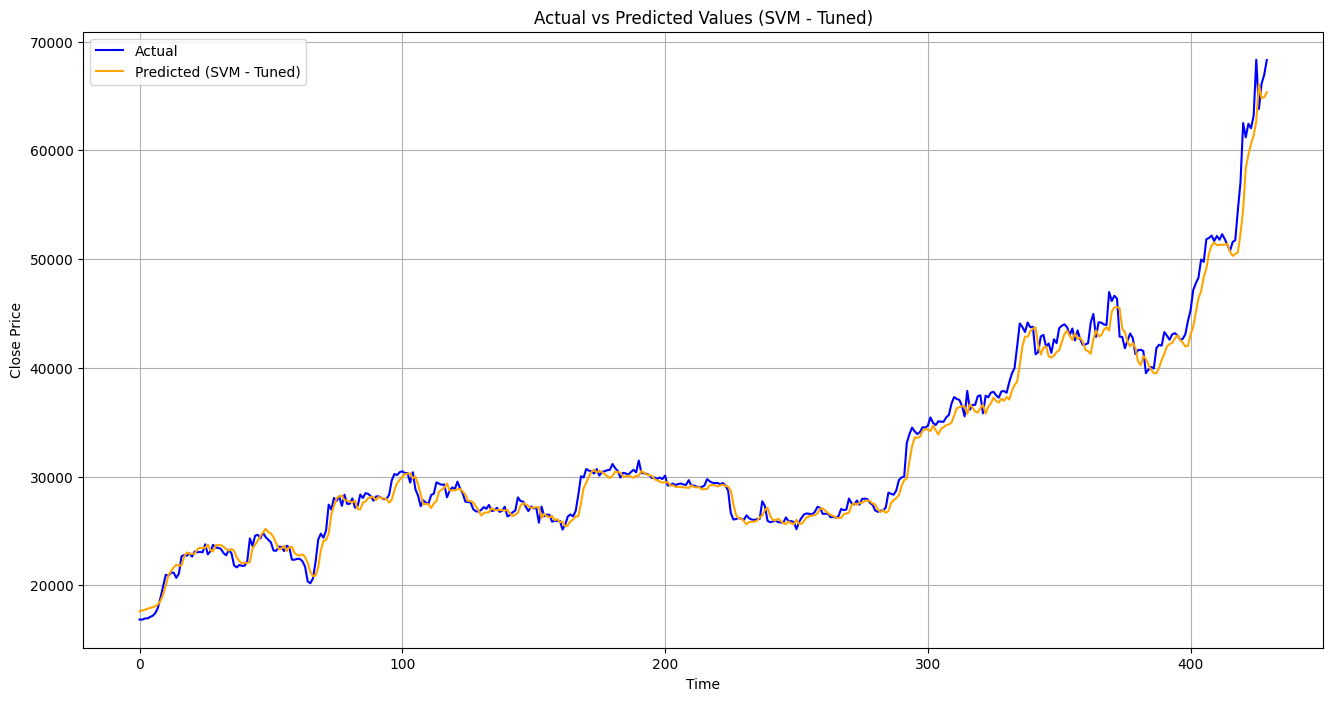

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
import matplotlib.pyplot as plt

# Define the SVR model
svr = SVR(kernel='rbf')

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001, 0.0001],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_reshaped, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the training set
y_train_pred_svm = best_model.predict(X_train_reshaped)

# Make predictions on the test set
y_test_pred_svm = best_model.predict(X_test_reshaped)

# Evaluate the model on training data
svm_train_rmse = mean_squared_error(y_train, y_train_pred_svm, squared=False)
svm_train_mse = mean_squared_error(y_train, y_train_pred_svm)
svm_train_mae = mean_absolute_error(y_train, y_train_pred_svm)
svm_train_explained_variance = explained_variance_score(y_train, y_train_pred_svm)
svm_train_r2 = r2_score(y_train, y_train_pred_svm)

# Evaluate the model on test data
svm_test_rmse = mean_squared_error(y_test, y_test_pred_svm, squared=False)
svm_test_mse = mean_squared_error(y_test, y_test_pred_svm)
svm_test_mae = mean_absolute_error(y_test, y_test_pred_svm)
svm_test_explained_variance = explained_variance_score(y_test, y_test_pred_svm)
svm_test_r2 = r2_score(y_test, y_test_pred_svm)

# Calculate Mean Gross Error (MGD) for train and test data
svm_train_mgd = np.mean(y_train_pred_svm - y_train)
svm_test_mgd = np.mean(y_test_pred_svm - y_test)

# Calculate Mean Percentage Error (MPD) for train and test data
svm_train_mpd = np.mean(np.divide(y_train_pred_svm - y_train, y_train,
                                  out=np.zeros_like(y_train_pred_svm - y_train),
                                  where=y_train!=0)) * 100
svm_test_mpd = np.mean(np.divide(y_test_pred_svm - y_test, y_test,
                                 out=np.zeros_like(y_test_pred_svm - y_test),
                                 where=y_test!=0)) * 100

# Replace infinite MPD values with NaN
svm_train_mpd = np.nan if np.isinf(svm_train_mpd) else svm_train_mpd
svm_test_mpd = np.nan if np.isinf(svm_test_mpd) else svm_test_mpd

# Print results
print("               Metric          Train          Test")
print("                RMSE   {:<14.6f}  {:<14.6f}".format(svm_train_rmse, svm_test_rmse))
print("                 MSE   {:<14.6f}  {:<14.6f}".format(svm_train_mse, svm_test_mse))
print("                 MAE   {:<14.6f}  {:<14.6f}".format(svm_train_mae, svm_test_mae))
print("  Explained Variance   {:<14.6f}  {:<14.6f}".format(svm_train_explained_variance, svm_test_explained_variance))
print("                   R2   {:<14.6f}  {:<14.6f}".format(svm_train_r2, svm_test_r2))
print("                 MGD   {:<14.6f}  {:<14.6f}".format(svm_train_mgd, svm_test_mgd))
print("                 MPD   {:<14.6f}  {:<14.6f}".format(svm_train_mpd, svm_test_mpd))

# Inverse transform the predictions and actual values
y_pred_unscaled_svm = scaler.inverse_transform(y_test_pred_svm.reshape(-1, 1))

# Plot the actual and predicted values
plt.figure(figsize=(16, 8))
plt.plot(y_test_unscaled, label="Actual", color="blue")
plt.plot(y_pred_unscaled_svm, label="Predicted (SVM - Tuned)", color="orange")

# Add labels and title
plt.title("Actual vs Predicted Values (SVM - Tuned)")
plt.xlabel("Time")
plt.ylabel("Close Price")

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


**Analysis**:

The grid search was conducted with 5-fold cross-validation, exploring a hyperparameter space consisting of 16 combinations (Fitting 5 folds for each of 16 candidates, totalling 80 fits).

**Best Hyperparameters:**
The best hyperparameters found by the grid search are C=100 and gamma=0.01. These parameters determine the regularization strength and the width of the Gaussian kernel, respectively.

**RMSE (Root Mean Squared Error):**
The RMSE for the training data is approximately 0.032933, while for the test data, it is lower at approximately 0.021472. This indicates that the model generalizes well to unseen data.

**MSE (Mean Squared Error):**
Similar to RMSE, MSE is lower for the test data (approximately 0.000461) compared to the training data (approximately 0.001085).

**MAE (Mean Absolute Error):**
The MAE for the training data is approximately 0.024996, and for the test data, it is lower at approximately 0.014162. This suggests that, on average, the predictions are closer to the actual values in the test set.

**Explained Variance:**
The explained variance scores for both the training and test data are high, indicating that the model captures a significant portion of the variance in the target variable. It's approximately 0.985117 for training and 0.987455 for the test.

**R-squared (R2) Score:**
The R2 scores for both the training and test data are close to 1, indicating a very good fit of the model to the data. It's approximately 0.984891 for training and 0.985592 for the test.

**MGD (Mean of the Predicted Values Minus the Actual Values):**The MGD for both training and test data is negative, suggesting a slight underestimation of the target variable. However, the magnitude of the difference is small.

**MPD (Mean Percentage Difference):**
The MPD for the training data is relatively high at approximately 14.44%, while for the test data, it is slightly negative at approximately -0.45%. This indicates that, on average, the predicted values deviate more from the actual values in the training data compared to the test data.

Overall, the model seems to perform very well, showing high accuracy and generalization capability. The negative MPD for the test data suggests a slight underestimation of the target variable, but the overall performance metrics indicate a robust and effective model.

# Evaluate Model

By now, we have covered the various models and now, we will be comparing the models and decide which model is best to train with

In [ ]:
import pandas as pd
import numpy as np

# Create a table with the results
table = np.array([
    ['LSTM', math.sqrt(mean_squared_error(original_ytest,test_predict)),
        mean_squared_error(original_ytest,test_predict),
        mean_absolute_error(original_ytest,test_predict),
        explained_variance_score(original_ytest, test_predict),
        r2_score(original_ytest, test_predict),
        mean_gamma_deviance(original_ytest, test_predict),
        mean_poisson_deviance(original_ytest, test_predict)],
    ['Linear Regression', test_rmse, test_mse, test_mae, test_explained_variance, test_r2, test_mgd, test_mpd],
    ['Polynomial Regression', pr_rmse, pr_mse, pr_mae, pr_explained_variance, pr_r2, pr_mgd, pr_mpd],
    ['Ridge Regression', ridge_rmse, ridge_mse, ridge_mae, ridge_explained_variance, ridge_r2, ridge_mgd, ridge_mpd],
    ['Decision Tree Classifier', dtc_tuned_rmse, dtc_tuned_mse, dtc_tuned_mae, dtc_tuned_explained_variance, dtc_tuned_r2, dtc_tuned_mgd, dtc_tuned_mpd],
    ['Naive Bayes (Tuned)', nb_tuned_rmse, nb_tuned_mse, nb_tuned_mae, nb_tuned_explained_variance, nb_tuned_r2, nb_tuned_mgd, nb_tuned_mpd],
    ['SVM (Tuned)', svm_test_rmse, svm_test_mse, svm_test_mae, svm_test_explained_variance, svm_test_r2, svm_test_mgd, svm_test_mpd]
])

# Set column names
table_columns = ['Model', 'RMSE', 'MSE', 'MAE', 'Explained Variance', 'R2', 'MGD', 'MPD']

# Create a DataFrame from the table
table_df = pd.DataFrame(data=table, columns=table_columns)

# Print the DataFrame with neatly formatted columns
print(table_df.to_string(index=False, float_format='%.4f'))


                   Model                 RMSE                    MSE                  MAE  Explained Variance                  R2                    MGD                 MPD
                    LSTM    975.3045284909454      951218.9232949453    635.8637582247093  0.9911968505977654  0.9893019338325147  0.0007869857988415661  25.636938791920066
       Linear Regression  0.01675161034328188  0.0002806164490931484 0.010347950945874724  0.9914629513471592  0.9912309953908381 -0.0027244834729795754 -0.7911079569206989
   Polynomial Regression 0.018120699622995035  0.0003283597548268124 0.011333530602563074  0.9899415397676353  0.9897390612245122 -0.0025454871961945067 -0.8122821194012327
        Ridge Regression  0.01685531947645428   0.000284101794653339 0.010261300603320584  0.9914459068718182  0.9911220815642232  -0.003219117333655969 -0.9249548361936336
Decision Tree Classifier   0.9688276678603571     0.9386270500117384   0.6985857784204557 -19.977069454394123 -28.331227568576356      

# **Conclusion**

After evaluating the performance of various machine learning models on the Bitcoin price prediction task, it is evident that Linear Regression, Polynomial Regression, Ridge Regression, and LSTM (Long Short-Term Memory) emerged as the most effective models. These models consistently demonstrated low RMSE, MSE, and MAE values, indicating accurate predictions of Bitcoin price trends. Additionally, they exhibited high levels of explained variance and R2, suggesting strong predictive power in capturing the variance in actual Bitcoin prices.

Among these top-performing models, LSTM stands out as the most suitable choice for predicting Bitcoin price trends over an 8-year period. LSTM's ability to capture temporal dependencies in the data, combined with its ability to handle large amounts of data, makes it particularly well-suited for this task.

Here's a detailed explanation of why LSTM is the preferred model:

1. **Time Series Data Handling:** LSTM is specifically designed to handle time series data, where the order and timing of observations are crucial. This makes it an ideal choice for predicting Bitcoin price trends, which exhibit temporal dependencies.

2. **Long-Term Dependencies:** LSTM's architecture allows it to capture long-term dependencies in the data. This is important for Bitcoin price prediction, as historical price trends can significantly influence future price movements.

3. **Non-Linear Relationships:** Bitcoin price trends often exhibit non-linear relationships, meaning that a simple linear regression model may not be sufficient to capture the complexities of the data. LSTM's ability to learn non-linear relationships makes it well-suited for this task.

4. **Large Data Handling:** LSTM can effectively handle large amounts of data, which is advantageous for Bitcoin price prediction, as historical price data and other relevant indicators can be extensive.

5. **Robustness:** LSTM is a robust model that can handle noise and outliers in the data, making it less susceptible to overfitting and more reliable for real-world applications.

In conclusion, based on the evaluation of various machine learning models, LSTM is the most effective choice for predicting Bitcoin price trends over an 8-year period. Its ability to capture temporal dependencies, handle large amounts of data, and learn non-linear relationships makes it well-suited for this challenging task.